# Aula 01 - Pandas e Estatísticas

In [ ]:
x = 2
print(x)

2


In [ ]:
x = x * 2
print(x)

4


In [ ]:
# http://dontpad.com/ppgiadatascience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')

In [ ]:
df

Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [ ]:
df.shape

(397, 7)

In [ ]:
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [ ]:
df.isna().sum()

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [ ]:
# df.drop(indice_linha, axis=0)
# df = df.drop('Unnamed: 0', axis=1)
df.drop('Unnamed: 0',
       axis=1, inplace=True)

In [ ]:
# Qual é o salário
# médio dos professores?
df['salary'].mean()

np.float64(113706.45843828715)

In [ ]:
# Qual é o maior e o menor salário?
df['salary'].max()

231545

In [ ]:
df['salary'].min()

57800

In [ ]:
# Desvio padrão
df['salary'].std()

30289.038694747804

In [ ]:
# Moda
df['salary'].mode()

0    92000
Name: salary, dtype: int64

In [ ]:
# Mediana
df['salary'].median()

107300.0

In [ ]:
# Quartis
df['salary'].quantile(0.25)

np.float64(91000.0)

In [ ]:
df['salary'].quantile(0.5)

np.float64(107300.0)

In [ ]:
df['salary'].quantile(0.75)

np.float64(134185.0)

In [ ]:
# Os 10% dos professores q melhor ganham,
# ganham a partir de qto?
df['salary'].quantile(0.9)

np.float64(152946.00000000003)

In [ ]:
df[['salary', 'yrs.service']].mean()

salary         113706.458438
yrs.service        17.614610
dtype: float64

In [ ]:
# Como identificar quais são as
# linhas iguais a moda?
moda = df['salary'].mode()
cond = df['salary'] == 92000
df[cond]

rank discipline  yrs.since.phd  yrs.service     sex  salary
146  AsstProf          B              4            4    Male   92000
151  AsstProf          B              4            4    Male   92000
154  AsstProf          B              4            0    Male   92000
179  AsstProf          B              3            3  Female   92000
197  AsstProf          B              4            4    Male   92000

In [ ]:
cond = df['salary'].isin(moda)
df[cond]

rank discipline  yrs.since.phd  yrs.service     sex  salary
146  AsstProf          B              4            4    Male   92000
151  AsstProf          B              4            4    Male   92000
154  AsstProf          B              4            0    Male   92000
179  AsstProf          B              3            3  Female   92000
197  AsstProf          B              4            4    Male   92000

In [ ]:
# Qual é o salário médio dAs
# professorAs da disciplina A e
# da disciplina B?
# and -> &
# or -> |
# not -> ~
# ==, !=, <, >, <=, >=
cond_mulheres = df['sex'] == 'Female'
cond_disc_a = df['discipline'] == 'A'
df[cond_mulheres & cond_disc_a]['salary'].mean()

np.float64(89064.94444444444)

In [ ]:
cond_disc_b = df['discipline'] == 'B'
df[cond_mulheres & cond_disc_b]['salary'].mean()

np.float64(111234.52380952382)

In [ ]:
# SQL (GROUP BY)
df_mulheres = df[cond_mulheres]
df_mulheres.groupby('discipline')\
            ['salary'].mean()

discipline
A     89064.944444
B    111234.523810
Name: salary, dtype: float64

In [ ]:
df.groupby(['sex', 'discipline'])\
          ['salary'].mean()

sex     discipline
Female  A              89064.944444
        B             111234.523810
Male    A             110699.981595
        B             118760.374359
Name: salary, dtype: float64

## Atividade

In [ ]:
df_ativ = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ans/dataset0.csv')

In [ ]:
df_ativ

x        y
0    55.3846  97.1795
1    51.5385  96.0256
2    46.1538  94.4872
3    42.8205  91.4103
4    40.7692  88.3333
..       ...      ...
137  39.4872  25.3846
138  91.2821  41.5385
139  50.0000  95.7692
140  47.9487  95.0000
141  44.1026  92.6923

[142 rows x 2 columns]

In [ ]:
df_ativ.describe()

x           y
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200

In [ ]:
df_ativ.corr()

x         y
x  1.000000 -0.064472
y -0.064472  1.000000

<Axes: xlabel='x', ylabel='y'>

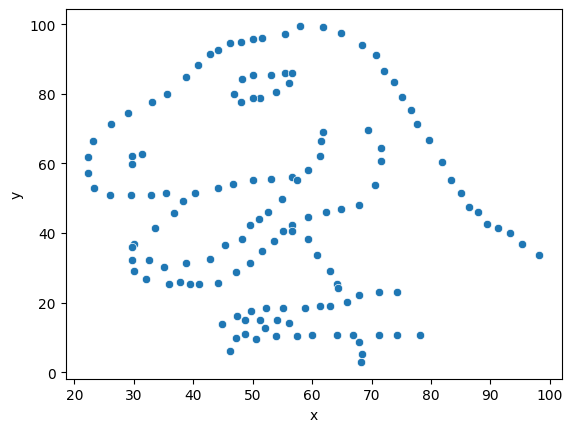

In [ ]:
sns.scatterplot(x=df_ativ['x'],
                y=df_ativ['y'])

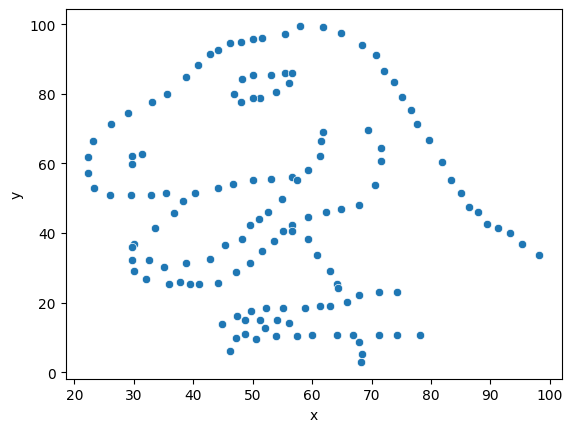

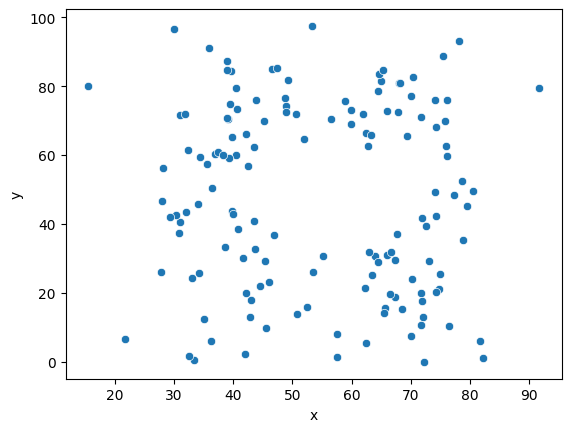

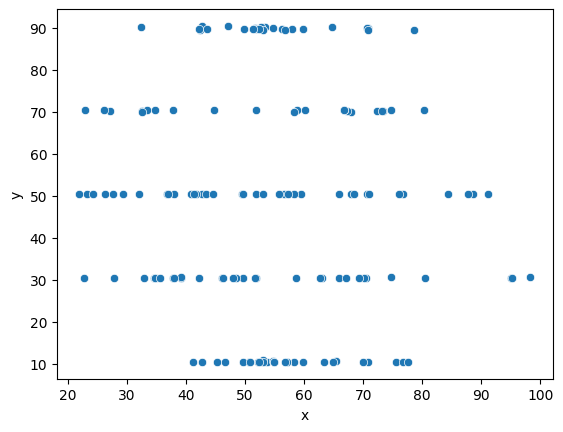

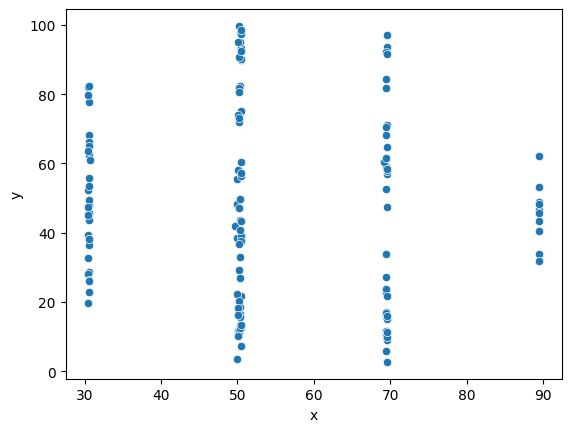

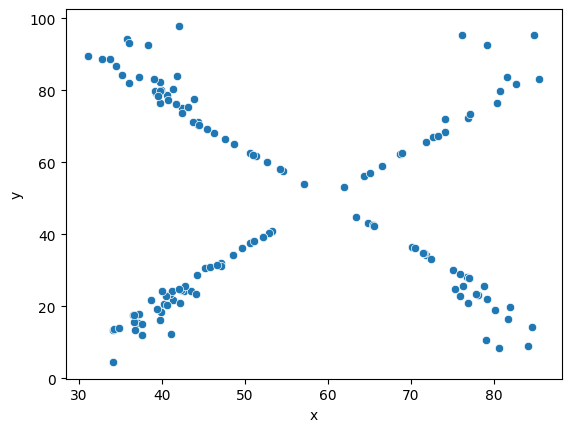

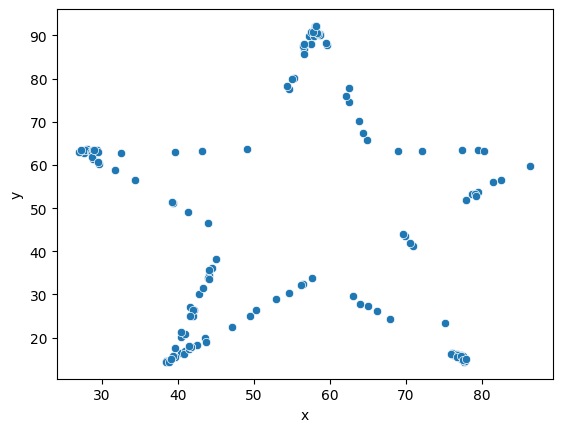

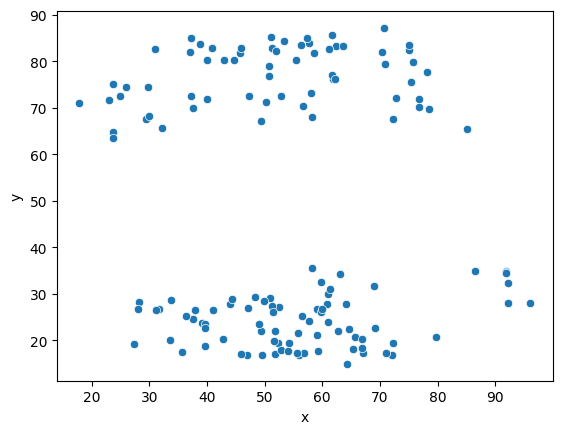

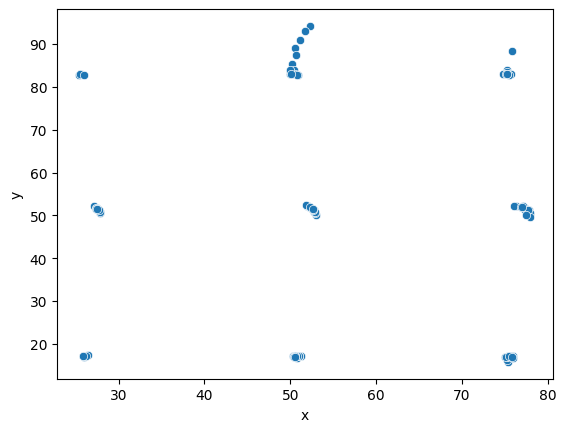

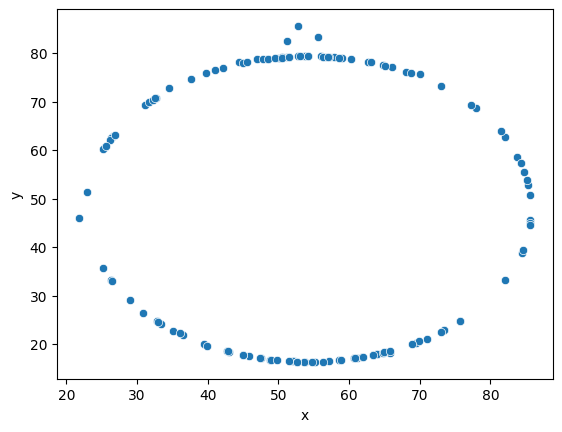

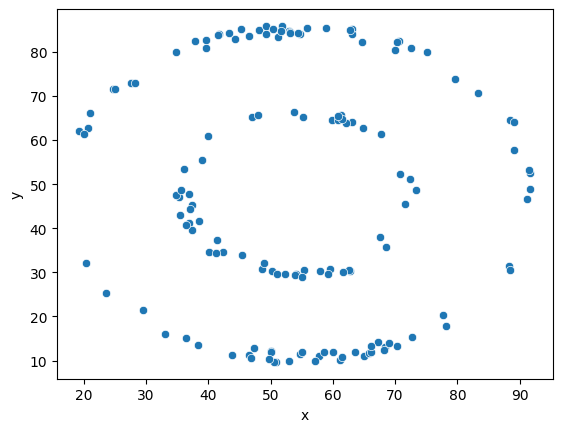

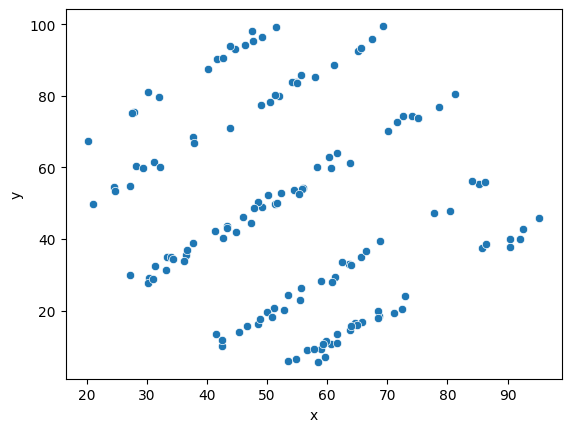

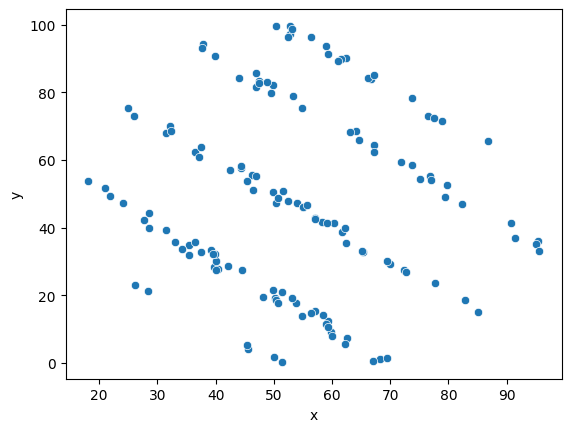

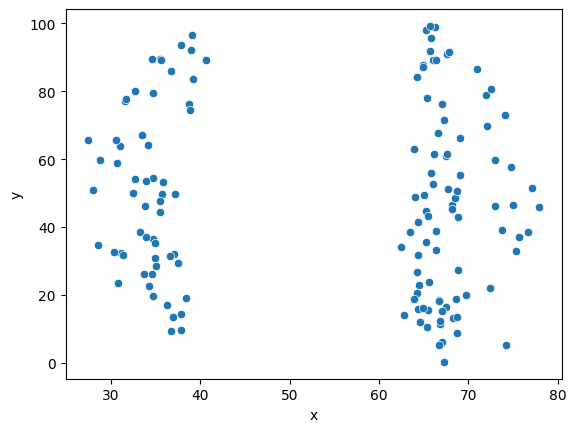

In [ ]:
for i in range(0, 13):
  df_ativ = pd.read_csv(f'https://jpbarddal.github.io/assets/data/datascience/ans/dataset{i}.csv')
  sns.scatterplot(x=df_ativ['x'],
                  y=df_ativ['y'])
  plt.show()

# Aula 02 - Análise Univariada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')

In [ ]:
df

Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]

## Histograma

<Axes: xlabel='salary', ylabel='Count'>

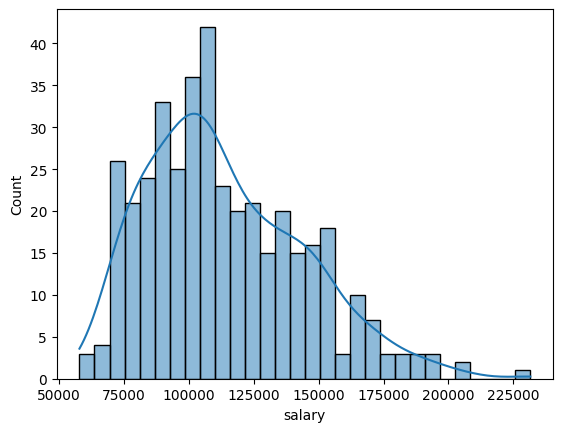

In [ ]:
sns.histplot(x=df['salary'],
             bins=30,
             kde=True)

In [ ]:
df['salary'].describe()

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64

## KDE Plot (densidade)

<Axes: xlabel='salary', ylabel='Density'>

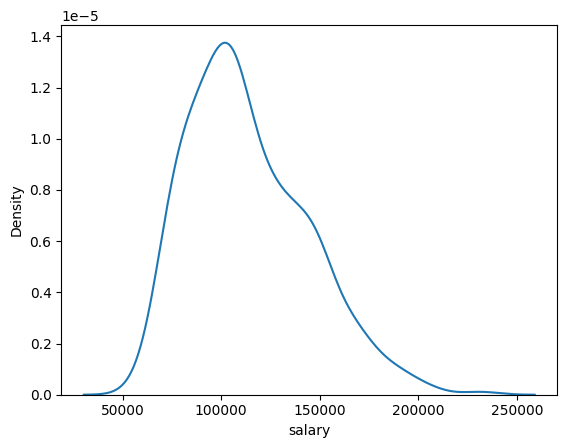

In [ ]:
sns.kdeplot(x=df['salary'])

## Boxplot

<Axes: xlabel='salary'>

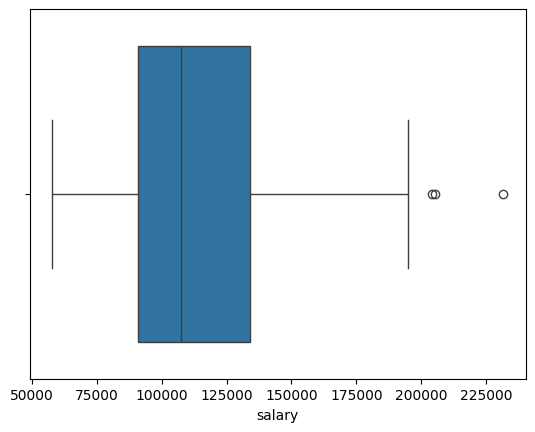

In [ ]:
sns.boxplot(x=df['salary'])

In [ ]:
df.describe()

Unnamed: 0  yrs.since.phd  yrs.service         salary
count  397.000000     397.000000   397.000000     397.000000
mean   199.000000      22.314861    17.614610  113706.458438
std    114.748275      12.887003    13.006024   30289.038695
min      1.000000       1.000000     0.000000   57800.000000
25%    100.000000      12.000000     7.000000   91000.000000
50%    199.000000      21.000000    16.000000  107300.000000
75%    298.000000      32.000000    27.000000  134185.000000
max    397.000000      56.000000    60.000000  231545.000000

## Violinplot

<Axes: xlabel='salary'>

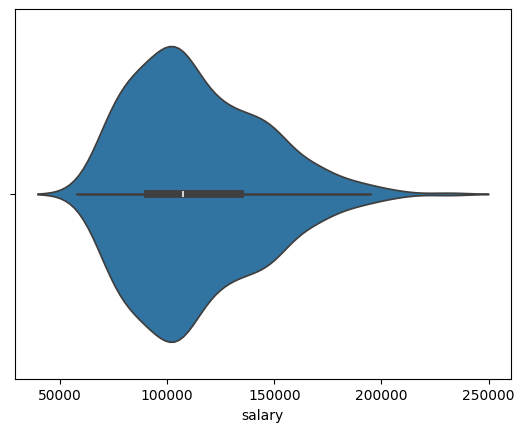

In [ ]:
sns.violinplot(x=df['salary'])

<Axes: xlabel='salary', ylabel='discipline'>

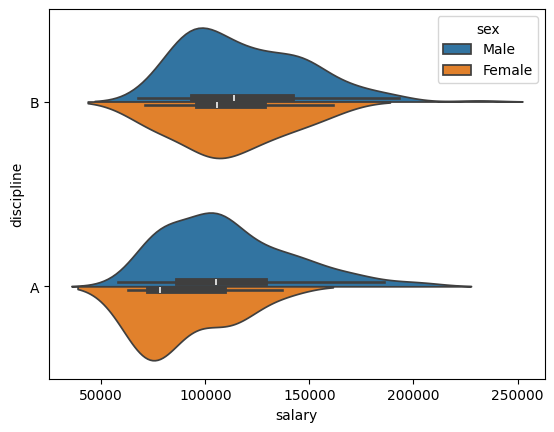

In [ ]:
sns.violinplot(x=df['salary'],
               y=df['discipline'],
               hue=df['sex'],
               split=True)

## Gráfico de Barras

<Axes: xlabel='count', ylabel='rank'>

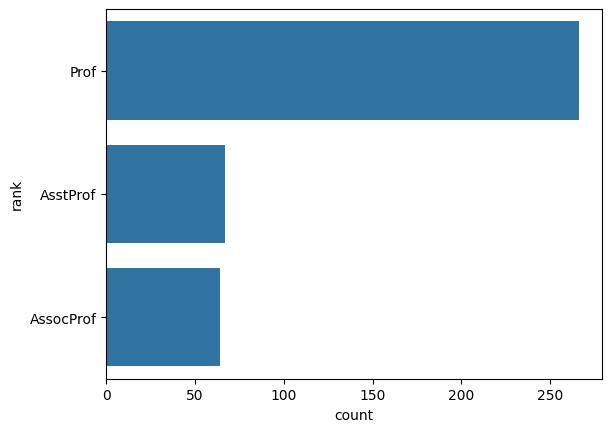

In [ ]:
sns.countplot(df['rank'])

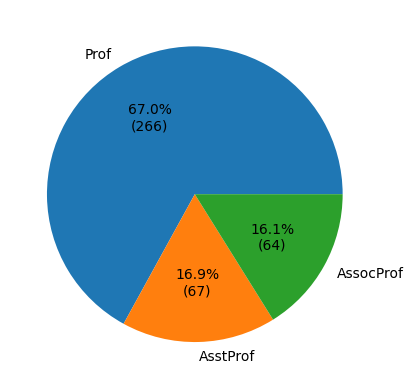

In [ ]:
def autopct_format(values):
  def myfmt(pct):
    total = sum(values)
    val = int(round(pct * total/100.0))
    return f'{pct:.1f}%\n({val})'
  return myfmt

s = df['rank'].value_counts()
plt.pie(s, labels=s.index, autopct=autopct_format(s))
plt.show()

## Atividade

In [ ]:
df_ommlbd = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ommlbd_familiar.csv')
df_ommlbd.replace(-9999,
                  np.nan,
                  inplace=True)

In [ ]:
df_ommlbd

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  MAIORRENDACASA  SOMARENDACASA  \
0        23325             NaN             NaN             NaN            NaN   
1       667198             NaN             NaN             NaN            NaN   
2       116666             NaN             NaN             NaN            NaN   
3       129342             2.0          1000.0          1200.0         2200.0   
4       681531             5.0           400.0          1400.0         4400.0   
...        ...             ...             ...             ...            ...   
438919   61760             NaN             NaN             NaN            NaN   
438920  209955             2.0           900.0          6000.0         6900.0   
438921   25054             2.0          2500.0         25000.0        27500.0   
438922   51513             NaN             NaN             NaN            NaN   
438923  616002             2.0          3000.0          4500.0         7500.0   

        MEDIARENDACASA  MAIORIDADECASA  MENORIDADECASA  MEDIAIDADECASA  \
0                  NaN             NaN             NaN             NaN   
1                  NaN             NaN             NaN             NaN   
2                  NaN             NaN             NaN             NaN   
3               1100.0            54.0            29.0            41.0   
4                880.0            43.0            16.0            25.0   
...                ...             ...             ...             ...   
438919             NaN             NaN             NaN             NaN   
438920          3450.0            38.0            38.0            38.0   
438921         13750.0            62.0            37.0            49.0   
438922             NaN             NaN             NaN             NaN   
438923          3750.0            31.0            25.0            28.0   

        INDICMENORDEIDADE  COBRANCABAIXOCASA  COBRANCAMEDIOCASA  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     0.0                0.0                0.0   
4                     1.0                0.0                0.0   
...                   ...                ...                ...   
438919                NaN                NaN                NaN   
438920                0.0                0.0                0.0   
438921                0.0                0.0                0.0   
438922                NaN                NaN                NaN   
438923                0.0                0.0                0.0   

        COBRANCAALTACASA  SEGMENTACAOFINBAIXACASA  SEGMENTACAOFINMEDIACASA  \
0                    NaN                      NaN                      NaN   
1                    NaN                      NaN                      NaN   
2                    NaN                      NaN                      NaN   
3                    0.0                      0.0                      0.0   
4                    0.0                      0.0                      0.0   
...                  ...                      ...                      ...   
438919               NaN                      NaN                      NaN   
438920               0.0                      0.0                      0.0   
438921               0.0                      0.0                      0.0   
438922               NaN                      NaN                      NaN   
438923               0.0                      0.0                      0.0   

        SEGMENTACAOALTACASA  BOLSAFAMILIACASA  FUNCIONARIOPUBLICOCASA  
0                       NaN               NaN                     NaN  
1                       NaN               NaN                     NaN  
2                       NaN               NaN                     NaN  
3                       0.0               0.0                     0.0  
4                       0.0               1.

In [ ]:
df_ommlbd.describe()

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  MAIORRENDACASA  \
count  438924.000000   165520.000000   165520.000000   165520.000000   
mean   324130.294748        2.993542     1211.068753     5259.854398   
std    205825.214515        1.231989     1438.357620     6079.701542   
min         0.000000        2.000000      400.000000      400.000000   
25%    147907.750000        2.000000      800.000000     1200.000000   
50%    294081.500000        3.000000      900.000000     3000.000000   
75%    515903.250000        4.000000     1000.000000     7000.000000   
max    698720.000000       10.000000    30000.000000    30000.000000   

       SOMARENDACASA  MEDIARENDACASA  MAIORIDADECASA  MENORIDADECASA  \
count  165520.000000   165520.000000   165472.000000   165472.000000   
mean     8306.661431     2902.041409       50.904298       24.809690   
std      8445.786665     2984.834142       13.807128       10.886317   
min       800.000000      400.000000        4.000000        1.000000   
25%      2900.000000     1000.000000       42.000000       18.000000   
50%      5400.000000     1800.000000       49.000000       23.000000   
75%     10300.000000     3533.000000       58.000000       30.000000   
max    100000.000000    30000.000000      128.000000      103.000000   

       MEDIAIDADECASA  INDICMENORDEIDADE  COBRANCABAIXOCASA  \
count   165472.000000      165520.000000      165520.000000   
mean        36.196613           0.064669           0.059981   
std         10.893769           0.245941           0.237452   
min          4.000000           0.000000           0.000000   
25%         29.000000           0.000000           0.000000   
50%         34.000000           0.000000           0.000000   
75%         42.000000           0.000000           0.000000   
max        103.000000           1.000000           1.000000   

       COBRANCAMEDIOCASA  COBRANCAALTACASA  SEGMENTACAOFINBAIXACASA  \
count      165520.000000     165520.000000            165520.000000   
mean            0.005486          0.003160                 0.063575   
std             0.073863          0.056123                 0.243996   
min             0.000000          0.000000                 0.000000   
25%             0.000000          0.000000                 0.000000   
50%             0.000000          0.000000                 0.000000   
75%             0.000000          0.000000                 0.000000   
max             1.000000          1.000000                 1.000000   

       SEGMENTACAOFINMEDIACASA  SEGMENTACAOALTACASA  BOLSAFAMILIACASA  \
count            165520.000000        165520.000000     165520.000000   
mean                  0.001172             0.000085          0.206803   
std                   0.034215             0.009196          0.405014   
min                   0.000000             0.000000          0.000000   
25%                   0.000000             0.000000          0.000000   
50%                   0.000000             0.000000          0.000000   
75%                   0.000000             0.000000          0.000000   
max                   1.000000             1.000000          1.000000   

       FUNCIONARIOPUBLICOCASA  
count           165520.000000  
mean                 0.197499  
std                  0.398113  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

In [ ]:
100 * df_ommlbd.isna().sum() / len(df_ommlbd)

HS_CPF                      0.000000
QTDPESSOASCASA             62.289599
MENORRENDACASA             62.289599
MAIORRENDACASA             62.289599
SOMARENDACASA              62.289599
MEDIARENDACASA             62.289599
MAIORIDADECASA             62.300535
MENORIDADECASA             62.300535
MEDIAIDADECASA             62.300535
INDICMENORDEIDADE          62.289599
COBRANCABAIXOCASA          62.289599
COBRANCAMEDIOCASA          62.289599
COBRANCAALTACASA           62.289599
SEGMENTACAOFINBAIXACASA    62.289599
SEGMENTACAOFINMEDIACASA    62.289599
SEGMENTACAOALTACASA        62.289599
BOLSAFAMILIACASA           62.289599
FUNCIONARIOPUBLICOCASA     62.289599
dtype: float64

(0.0, 20000.0)

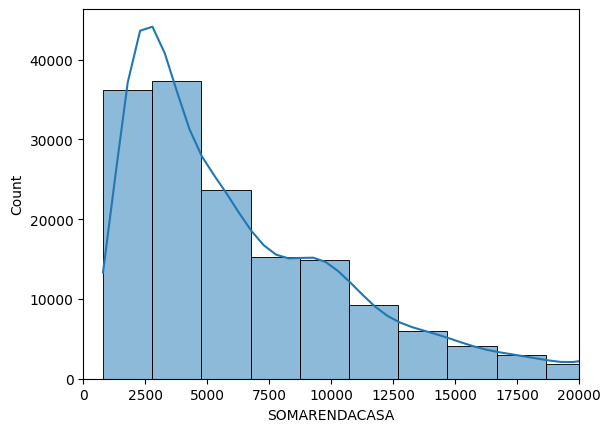

In [ ]:
sns.histplot(x=df_ommlbd['SOMARENDACASA'],
             bins=50,
             kde=True)
plt.xlim((0, 20000))

<Axes: xlabel='SOMARENDACASA'>

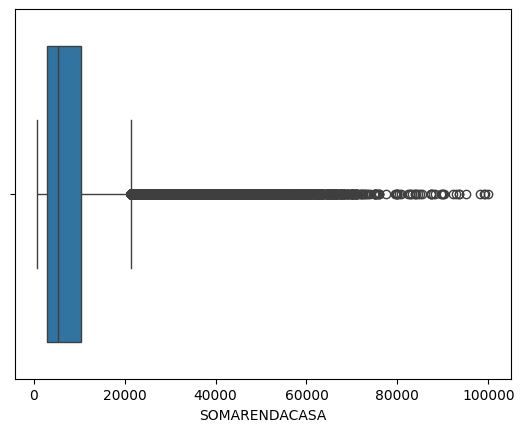

In [ ]:
sns.boxplot(x=df_ommlbd['SOMARENDACASA'])

## Transformação de Dados

In [ ]:
from sklearn.preprocessing import PowerTransformer

<Axes: xlabel='SOMARENDACASA', ylabel='Count'>

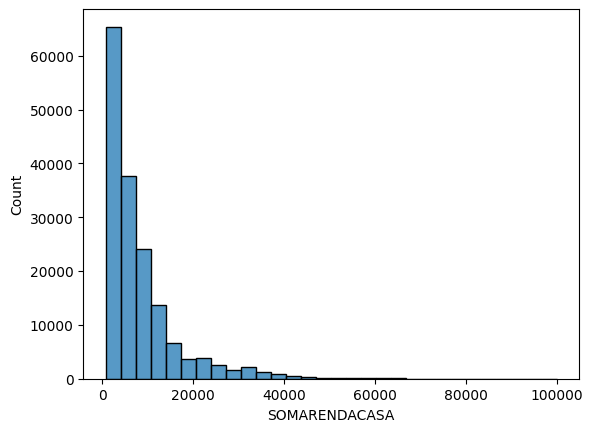

In [ ]:
rendas_antes = df_ommlbd['SOMARENDACASA']
sns.histplot(rendas_antes, bins=30)

In [ ]:
# Box-cox: limitação (só funciona com dados positivos)
# Yeo-johnson: (aceita números negativos, zero, positivos, etc)
# bc = PowerTransformer(method='box-cox')
bc = PowerTransformer(method='yeo-johnson')
rendas_depois = bc.fit_transform(rendas_antes.values.reshape(-1, 1))

<Axes: ylabel='Count'>

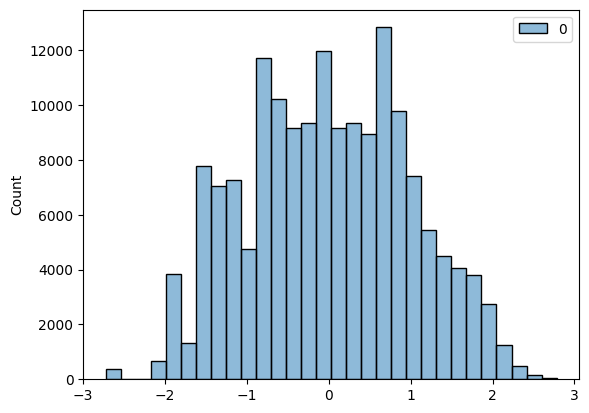

In [ ]:
sns.histplot(rendas_depois, bins=30)

<Axes: ylabel='Count'>

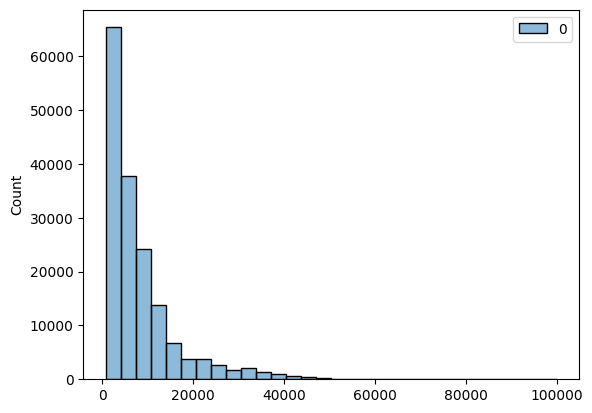

In [ ]:
renda_volta = bc.inverse_transform(rendas_depois)
sns.histplot(renda_volta, bins=30)

In [ ]:
transformador = PowerTransformer(method='yeo-johnson')
df_transformado = pd.DataFrame(data=transformador.fit_transform(df_ommlbd), columns=df_ommlbd.columns)

In [ ]:
df_transformado

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  MAIORRENDACASA  \
0      -1.794091             NaN             NaN             NaN   
1       1.453692             NaN             NaN             NaN   
2      -0.961206             NaN             NaN             NaN   
3      -0.876386       -1.043463        0.249848       -1.008200   
4       1.500888        1.509392       -1.902911       -0.820794   
...          ...             ...             ...             ...   
438919 -1.385161             NaN             NaN             NaN   
438920 -0.402030       -1.043463        0.050876        0.707877   
438921 -1.771316       -1.043463        1.590918        1.854844   
438922 -1.479928             NaN             NaN             NaN   
438923  1.281550       -1.043463        1.789952        0.437503   

        SOMARENDACASA  MEDIARENDACASA  MAIORIDADECASA  MENORIDADECASA  \
0                 NaN             NaN             NaN             NaN   
1                 NaN             NaN             NaN             NaN   
2                 NaN             NaN             NaN             NaN   
3           -1.167411       -0.764900        0.320592        0.483667   
4           -0.245807       -1.148072       -0.515051       -0.788916   
...               ...             ...             ...             ...   
438919            NaN             NaN             NaN             NaN   
438920       0.296364        0.773425       -0.947964        1.195548   
438921       1.723038        1.947155        0.852170        1.121117   
438922            NaN             NaN             NaN             NaN   
438923       0.392326        0.862350       -1.630579        0.130596   

        MEDIAIDADECASA  INDICMENORDEIDADE  COBRANCABAIXOCASA  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3             0.566459          -0.262945          -0.252602   
4            -1.102295           3.803075          -0.252602   
...                ...                ...                ...   
438919             NaN                NaN                NaN   
438920        0.308727          -0.262945          -0.252602   
438921        1.172623          -0.262945          -0.252602   
438922             NaN                NaN                NaN   
438923       -0.722130          -0.262945          -0.252602   

        COBRANCAMEDIOCASA  COBRANCAALTACASA  SEGMENTACAOFINBAIXACASA  \
0                     NaN               NaN                      NaN   
1                     NaN               NaN                      NaN   
2                     NaN               NaN                      NaN   
3                -0.07427         -0.056301                 -0.26056   
4                -0.07427         -0.056301                 -0.26056   
...                   ...               ...                      ...   
438919                NaN               NaN                      NaN   
438920           -0.07427         -0.056301                 -0.26056   
438921           -0.07427         -0.056301                 -0.26056   
438922                NaN               NaN                      NaN   
438923           -0.07427         -0.056301                 -0.26056   

        SEGMENTACAOFINMEDIACASA  SEGMENTACAOALTACASA  BOLSAFAMILIACASA  \
0                           NaN                  NaN               NaN   
1                           NaN                  NaN               NaN   
2                           NaN                  NaN               NaN   
3                     -0.034255            -0.009197         -0.510608   
4                     -0.034255            -0.009197          1.958449   
...                         ...                  ...               ...   
438919                      NaN                  NaN               NaN   
438920                -0.034255            -0.009197         -0.510608   
438921          

In [ ]:
transformador.lambdas_

array([ 5.83433145e-01, -1.78516195e+00, -5.18203850e-01, -1.85931896e-01,
       -1.71788407e-01, -3.68014932e-01,  2.47093419e-01,  4.66712869e-01,
       -2.66026404e-03, -2.23088731e+01, -2.40526452e+01, -2.62989963e+02,
       -4.56586796e+02, -2.26926094e+01, -1.23090152e+03, -1.70567785e+04,
       -6.65336944e+00, -7.03043142e+00])

In [ ]:
# Investigar: Pipeline (sklearn)

# Aula 03 - Análise multivariada de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')

In [ ]:
df

Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]

<Axes: xlabel='yrs.service', ylabel='salary'>

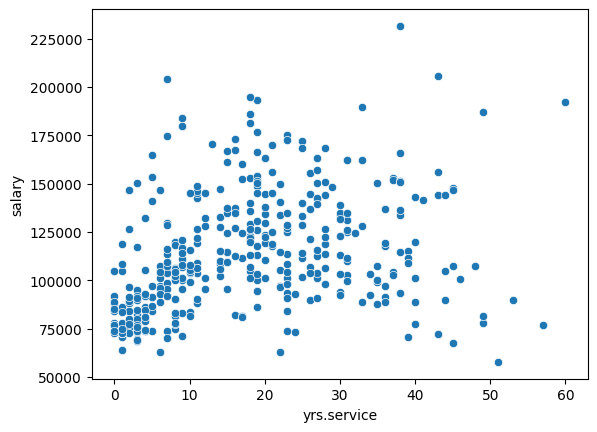

In [ ]:
# Scatterplot
sns.scatterplot(x=df['yrs.service'],
                y=df['salary'])

<Axes: xlabel='rank', ylabel='salary'>

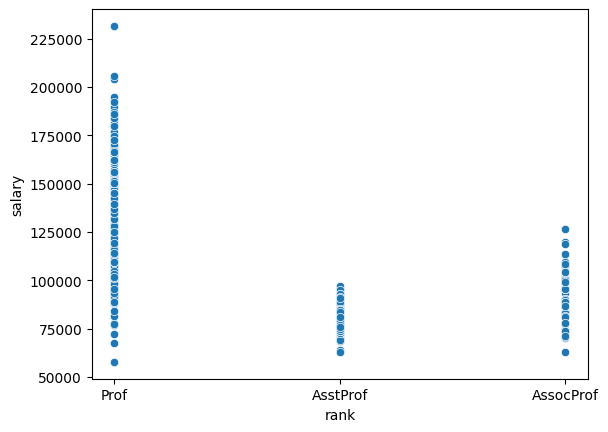

In [ ]:
sns.scatterplot(x=df['rank'],
                y=df['salary'])

<Axes: xlabel='rank', ylabel='salary'>

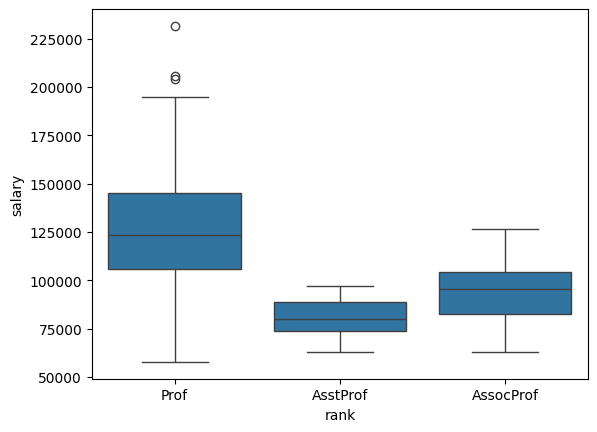

In [ ]:
sns.boxplot(x=df['rank'],
            y=df['salary'])

<Axes: xlabel='rank', ylabel='salary'>

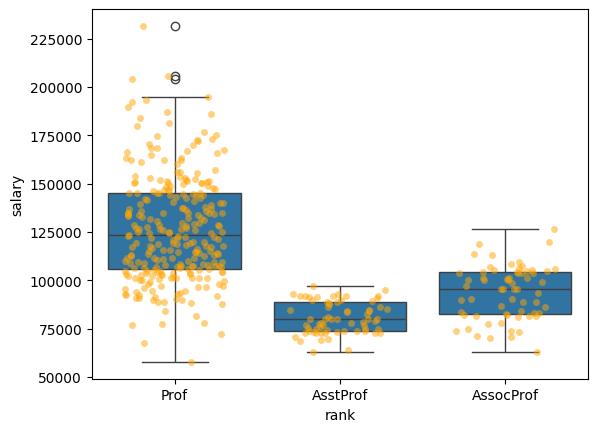

In [ ]:
sns.boxplot(x=df['rank'],
            y=df['salary'])
# sns.scatterplot(x=df['rank'],
#               y=df['salary'])
sns.stripplot(x=df['rank'],
              y=df['salary'],
              jitter=0.3,
              color='orange',
              alpha=0.5)

<ipython-input-26-de7e5de246b4>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gray'` for the same effect.

  sns.stripplot(x=df['rank'],


<Axes: xlabel='rank', ylabel='salary'>

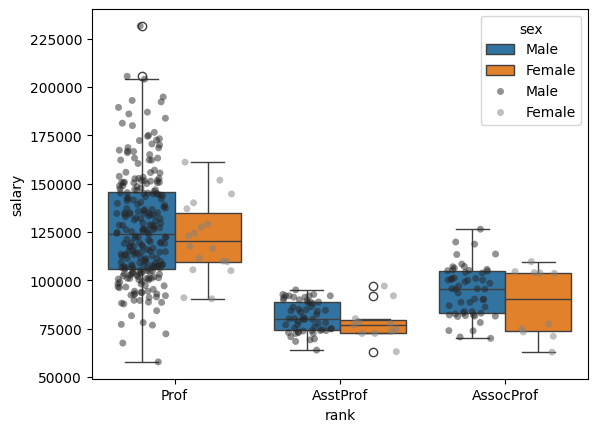

In [ ]:
sns.boxplot(x=df['rank'],
            y=df['salary'],
            hue=df['sex'])
sns.stripplot(x=df['rank'],
              y=df['salary'],
              hue=df['sex'],
              jitter=0.3,
              dodge=True,
              color='gray',
              alpha=0.5)

In [ ]:
sns.boxplot()

Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]

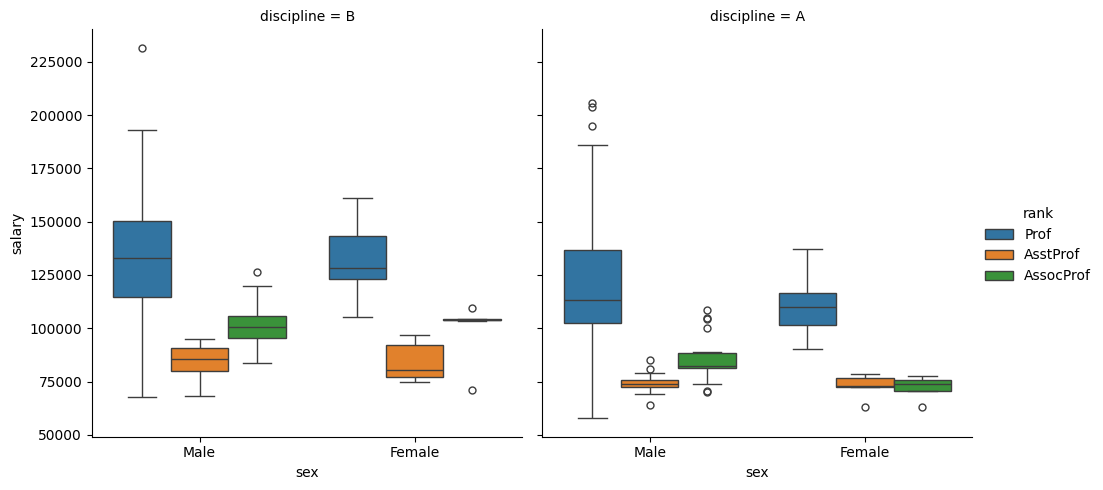

In [ ]:
sns.catplot(
    data=df,
    x="sex",
    y="salary",
    col="discipline",
    hue='rank',
    kind="box",
)
# sns.catplot(
#     data=df, x="sex", y="salary", col="rank",
#     kind="box",
# )

<Axes: xlabel='yrs.service', ylabel='salary'>

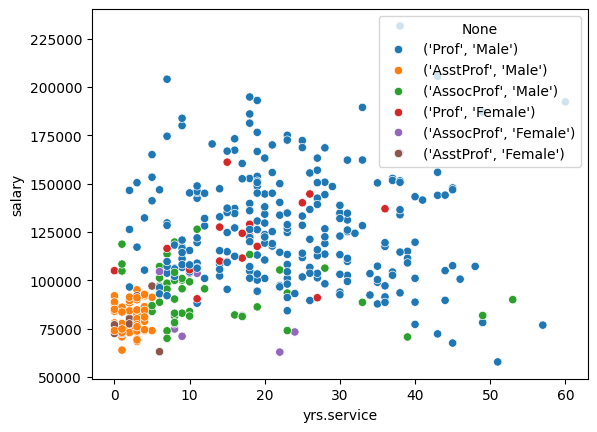

In [ ]:
sns.scatterplot(x=df['yrs.service'],
                y=df['salary'],
                hue=df[['rank', 'sex']].apply(tuple, axis=1))

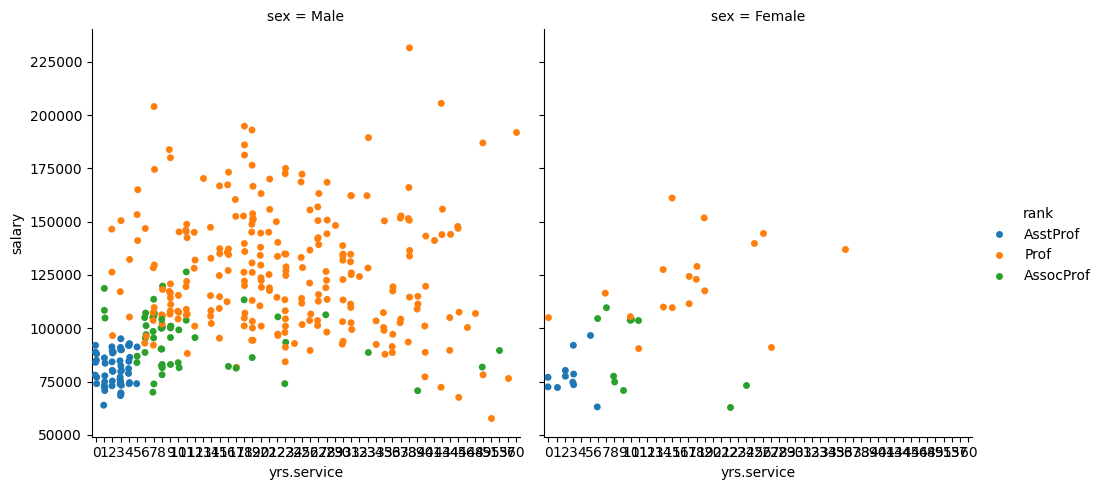

In [ ]:
sns.catplot(x=df['yrs.service'],
            y=df['salary'],
            hue=df['rank'],
            col=df['sex'])

<Axes: xlabel='yrs.service', ylabel='salary'>

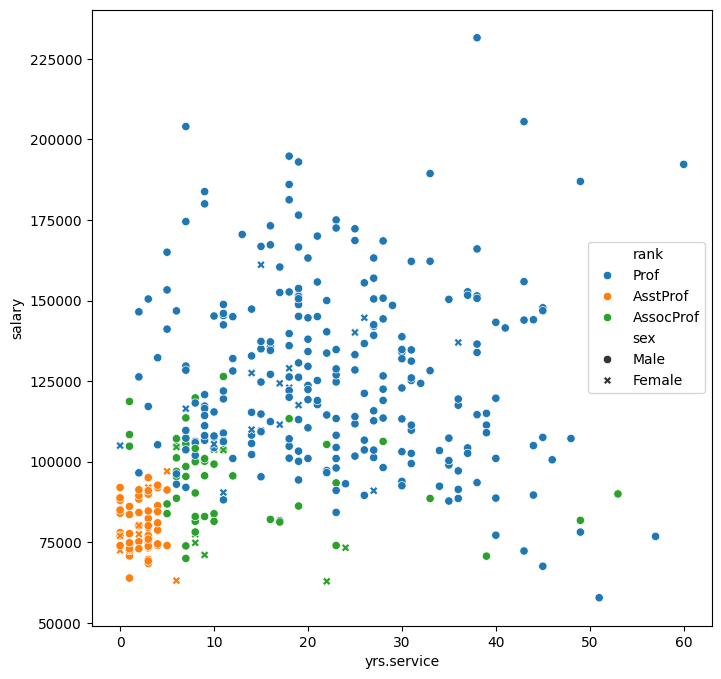

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=df['yrs.service'],
    y=df['salary'],
    hue=df['rank'],
    style=df['sex']
)

<Axes: xlabel='yrs.service', ylabel='salary'>

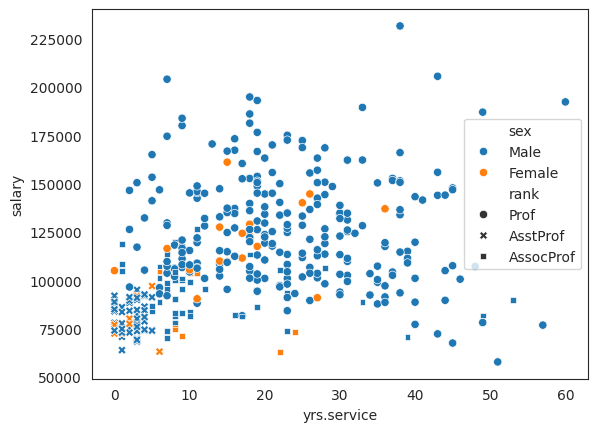

In [ ]:
sns.scatterplot(x="yrs.service", y="salary", hue="sex", style="rank", data=df)

In [ ]:
# Criar a base
df = pd.DataFrame({
    'x' : np.random.normal(10, 1.2, 20000),
    'y' : np.random.normal(10, 1.2, 20000),
    'group' : np.repeat('A', 20000)
})

tmp1 = pd.DataFrame({
    'x' : np.random.normal(14.5, 1.2, 20000),
    'y' : np.random.normal(14.5, 1.2, 20000),
    'group' : np.repeat('B', 20000)
})

tmp2 = pd.DataFrame({
    'x' : np.random.normal(9.5, 1.5, 20000),
    'y' : np.random.normal(15.5, 1.5, 20000),
    'group' : np.repeat('C', 20000)
})

# concatenating the data
df = pd.concat([df, tmp1, tmp2])

In [ ]:
df

x          y group
0      10.454476  11.251736     A
1       9.580528   9.867030     A
2       9.268397   7.851297     A
3       9.004389   9.237668     A
4       7.899331   9.396429     A
...          ...        ...   ...
19995   8.813714  15.751912     C
19996   9.851154  15.443989     C
19997   8.123302  15.443874     C
19998   8.733528  14.358307     C
19999   8.881666  11.967378     C

[60000 rows x 3 columns]

<Axes: xlabel='x', ylabel='y'>

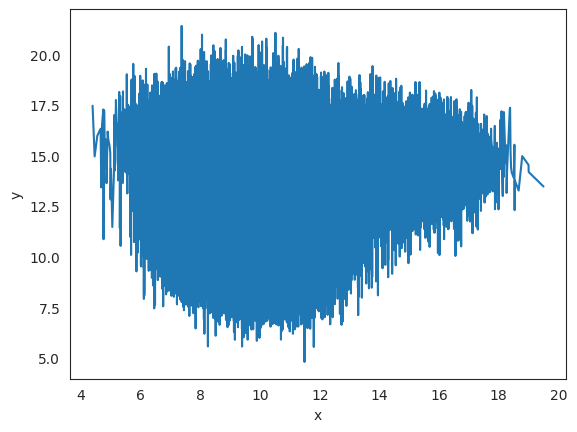

In [ ]:
sns.lineplot(x=df['x'], y=df['y'])

<Axes: xlabel='x', ylabel='y'>

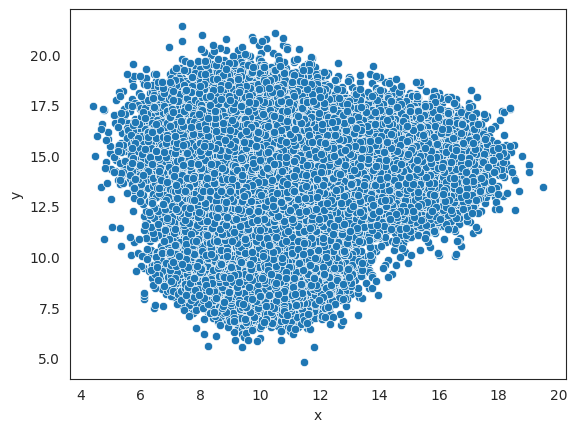

In [ ]:
sns.scatterplot(x=df['x'], y=df['y'])

<Axes: xlabel='x', ylabel='y'>

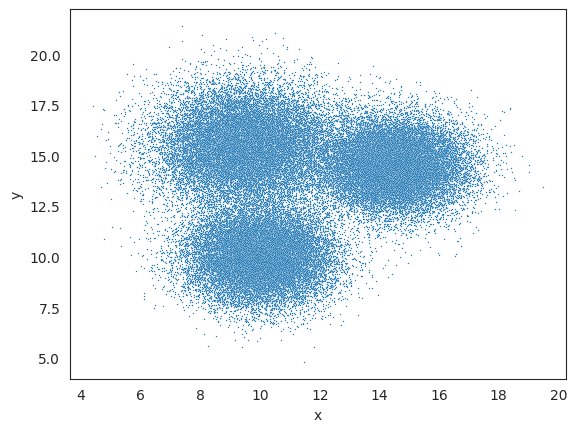

In [ ]:
# tamanho de marcador
sns.scatterplot(x=df['x'],
                y=df['y'],
                s=1)

<Axes: xlabel='x', ylabel='y'>

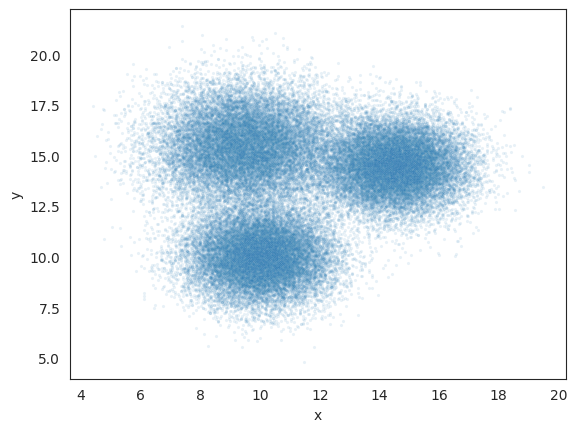

In [ ]:
# transparencia
sns.scatterplot(x=df['x'],
                y=df['y'],
                alpha=0.1,
                s=5)

<ipython-input-61-4975958cc540>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['x'],


<Axes: xlabel='x', ylabel='y'>

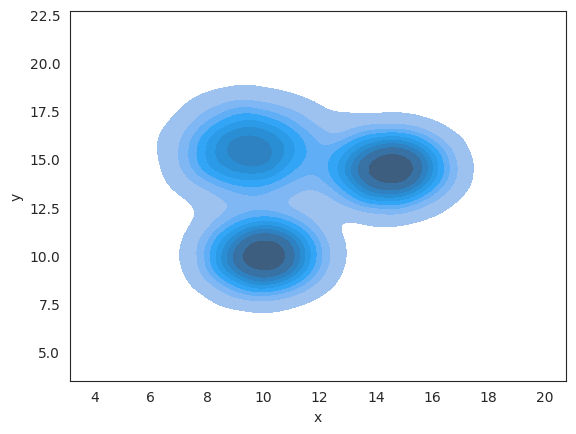

In [ ]:
# densidade
sns.kdeplot(x=df['x'],
            y=df['y'],
            fill=True)

<Axes: xlabel='x', ylabel='y'>

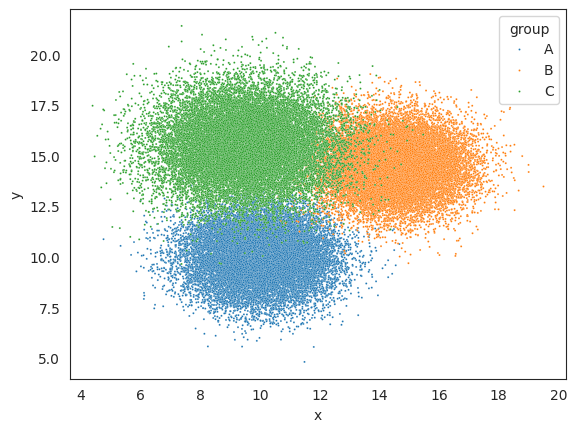

In [ ]:
sns.scatterplot(x=df['x'],
                y=df['y'],
                hue=df['group'],
                s=2)

<Axes: xlabel='x', ylabel='y'>

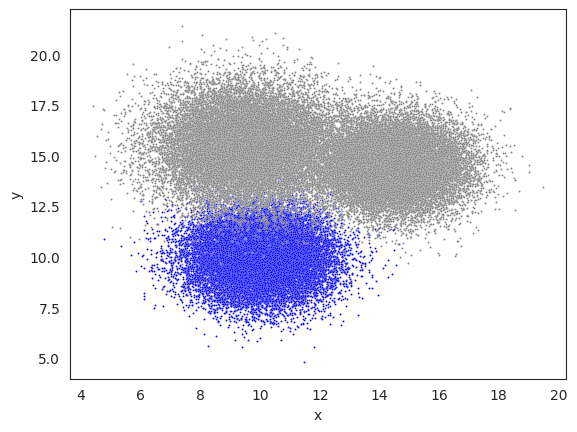

In [ ]:
df_a = df[df['group'] == 'A']
df_resto = df[df['group'] != 'A']
sns.scatterplot(x=df_a['x'], y=df_a['y'], color='blue', s=2)
sns.scatterplot(x=df_resto['x'], y=df_resto['y'], color='gray', s=2)

## Atividade

In [ ]:
df = pd.read_csv('https://www.dropbox.com/s/m1e44xinrkn99qq/kobe_shots.csv?dl=1')

In [ ]:
df

action_type combined_shot_type  game_event_id   game_id      lat  \
0              Jump Shot          Jump Shot             10  20000012  33.9723   
1              Jump Shot          Jump Shot             12  20000012  34.0443   
2              Jump Shot          Jump Shot             35  20000012  33.9093   
3              Jump Shot          Jump Shot             43  20000012  33.8693   
4      Driving Dunk Shot               Dunk            155  20000012  34.0443   
...                  ...                ...            ...       ...      ...   
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0        167     72 -118.1028                 10       1  ...  2PT Field Goal   
1       -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2       -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3        138    175 -118.1318                  6       1  ...  2PT Field Goal   
4          0      0 -118.2698                  6       2  ...  2PT Field Goal   
...      ...    ...       ...                ...     ...  ...             ...   
30692      1     48 -118.2688                  6       4  ...  2PT Field Goal   
30693      0      0 -118.2698                  6       4  ...  2PT Field Goal   
30694   -134    166 -118.4038                  3       4  ...  2PT Field Goal   
30695     31    267 -118.2388                  2       4  ...  3PT Field Goal   
30696      1     72 -118.2688                  0       4  ...  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
0      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
1      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
2      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
3      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
4      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
...           ...                 ...         ...          ...      ...   
30692  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30693  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30694  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30695  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30696  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   

       shot_id  
0            1  
1            2  
2            3  
3            4  
4            5  
...        ...  
30692    30693  
30693    30694  
30694    30695  
30695    30696  
30696    30697  

[30697 rows x 25 columns]

<Axes: ylabel='shot_zone_basic'>

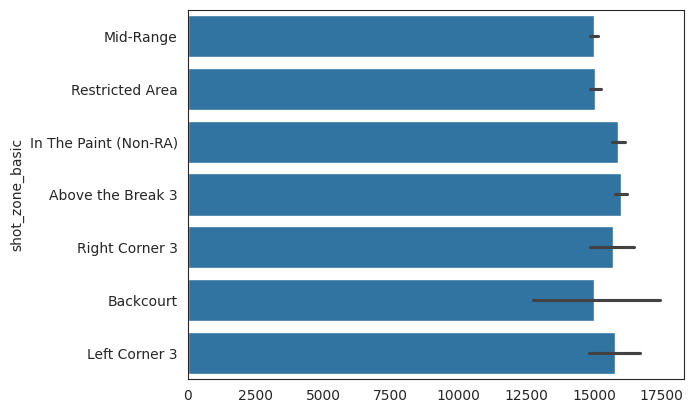

In [ ]:
sns.barplot(df['shot_zone_basic'])

# Aula 04 - Correlações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/meses_producao_custo.csv')

In [ ]:
df

Meses  litros  custo
0    Jan   20200  19000
1    Fev   16700  17000
2    Mar   14800  14000
3    Abr   16000  15000
4    Mai   12100  14000
5    Jun   13000  15000
6    Jul   11600  13000
7    Ago   15500  16000
8    Set   18900  18000
9    Out   20000  19000
10   Nov   22500  20000
11   Dez   23000  21000

Text(12000, 20000, 'Pearson r = 0.97')

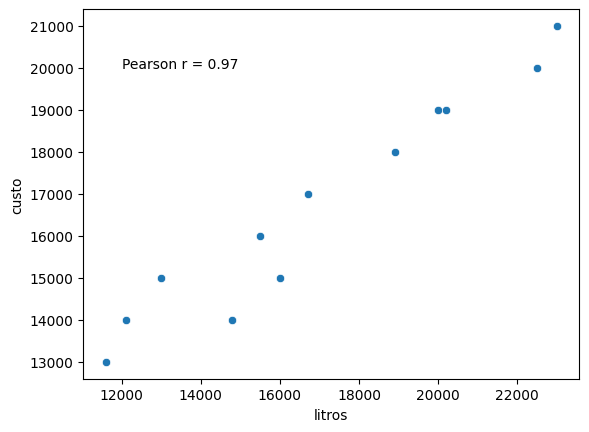

In [ ]:
sns.scatterplot(x=df['litros'],
                y=df['custo'])
r, _ = stats.pearsonr(df['litros'], df['custo'])
plt.text(x=12_000, y=20_000, s=f'Pearson r = {r:.2f}')

Text(12000, 20000, 'Pearson r = 0.97')

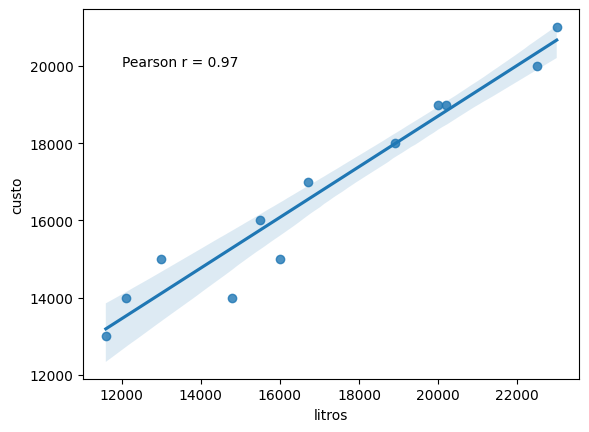

In [ ]:
sns.regplot(x=df['litros'],
            y=df['custo'])
r, _ = stats.pearsonr(df['litros'], df['custo'])
plt.text(x=12_000, y=20_000, s=f'Pearson r = {r:.2f}')

Text(12000, 20000, 'Pearson r = 0.97')

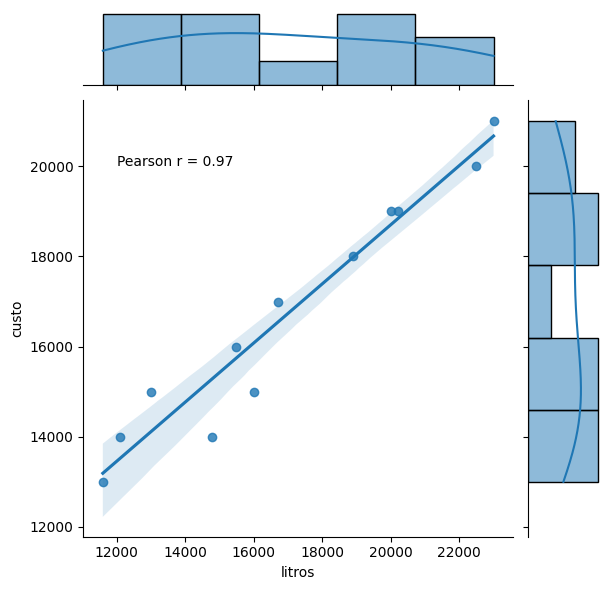

In [ ]:
sns.jointplot(x=df['litros'],
              y=df['custo'],
              kind='reg')
r, _ = stats.pearsonr(df['litros'], df['custo'])
plt.text(x=12_000, y=20_000, s=f'Pearson r = {r:.2f}')

Text(-2, 1.0, 'Pearson r = 0.00')

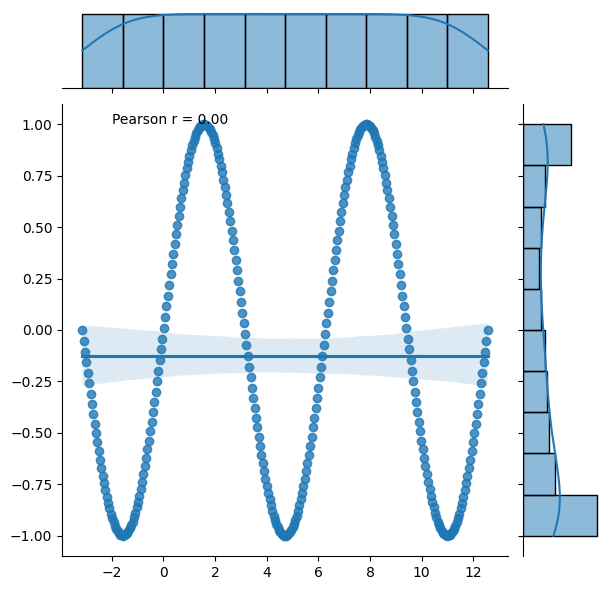

In [ ]:
x = np.linspace(-np.pi, 4*np.pi, 300)
y = np.sin(x)
sns.jointplot(x=x, y=y, kind='reg')
r, _ = stats.pearsonr(x, y)
plt.text(x=-2, y=1.0, s=f'Pearson r = {r:.2f}')
# plt.title(f'Pearson r = {r:.2f}')

In [ ]:
df.select_dtypes(include='number').corr()

litros     custo
litros  1.000000  0.969993
custo   0.969993  1.000000

In [ ]:
df_ommlbd = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ommlbd_familiar.csv')
df_ommlbd.replace(-9999, np.nan, inplace=True)

In [ ]:
df_ommlbd

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  MAIORRENDACASA  SOMARENDACASA  \
0        23325             NaN             NaN             NaN            NaN   
1       667198             NaN             NaN             NaN            NaN   
2       116666             NaN             NaN             NaN            NaN   
3       129342             2.0          1000.0          1200.0         2200.0   
4       681531             5.0           400.0          1400.0         4400.0   
...        ...             ...             ...             ...            ...   
438919   61760             NaN             NaN             NaN            NaN   
438920  209955             2.0           900.0          6000.0         6900.0   
438921   25054             2.0          2500.0         25000.0        27500.0   
438922   51513             NaN             NaN             NaN            NaN   
438923  616002             2.0          3000.0          4500.0         7500.0   

        MEDIARENDACASA  MAIORIDADECASA  MENORIDADECASA  MEDIAIDADECASA  \
0                  NaN             NaN             NaN             NaN   
1                  NaN             NaN             NaN             NaN   
2                  NaN             NaN             NaN             NaN   
3               1100.0            54.0            29.0            41.0   
4                880.0            43.0            16.0            25.0   
...                ...             ...             ...             ...   
438919             NaN             NaN             NaN             NaN   
438920          3450.0            38.0            38.0            38.0   
438921         13750.0            62.0            37.0            49.0   
438922             NaN             NaN             NaN             NaN   
438923          3750.0            31.0            25.0            28.0   

        INDICMENORDEIDADE  COBRANCABAIXOCASA  COBRANCAMEDIOCASA  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     0.0                0.0                0.0   
4                     1.0                0.0                0.0   
...                   ...                ...                ...   
438919                NaN                NaN                NaN   
438920                0.0                0.0                0.0   
438921                0.0                0.0                0.0   
438922                NaN                NaN                NaN   
438923                0.0                0.0                0.0   

        COBRANCAALTACASA  SEGMENTACAOFINBAIXACASA  SEGMENTACAOFINMEDIACASA  \
0                    NaN                      NaN                      NaN   
1                    NaN                      NaN                      NaN   
2                    NaN                      NaN                      NaN   
3                    0.0                      0.0                      0.0   
4                    0.0                      0.0                      0.0   
...                  ...                      ...                      ...   
438919               NaN                      NaN                      NaN   
438920               0.0                      0.0                      0.0   
438921               0.0                      0.0                      0.0   
438922               NaN                      NaN                      NaN   
438923               0.0                      0.0                      0.0   

        SEGMENTACAOALTACASA  BOLSAFAMILIACASA  FUNCIONARIOPUBLICOCASA  
0                       NaN               NaN                     NaN  
1                       NaN               NaN                     NaN  
2                       NaN               NaN                     NaN  
3                       0.0               0.0                     0.0  
4                       0.0               1.

<Axes: >

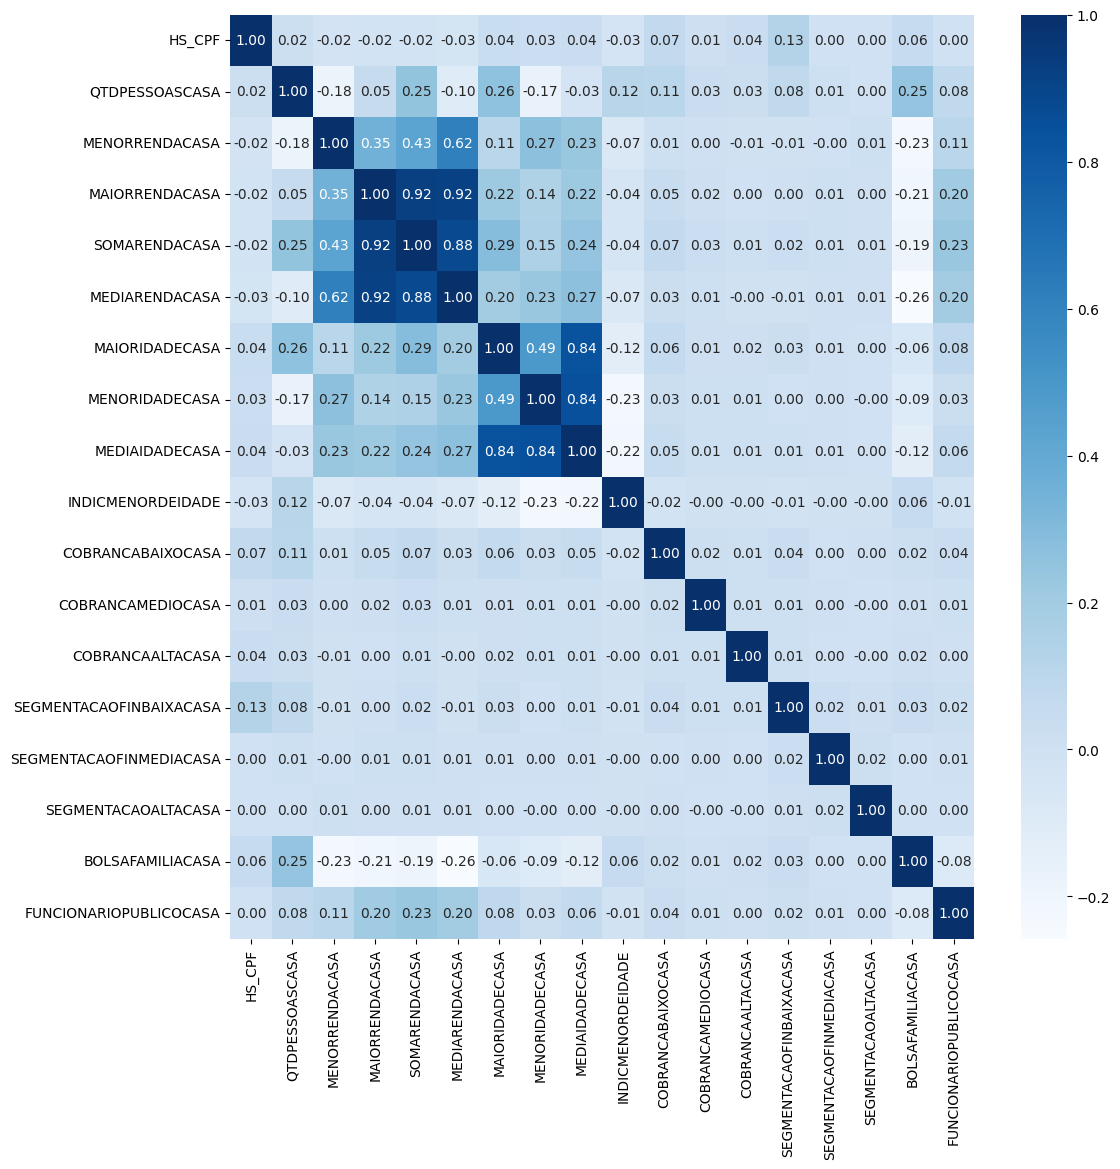

In [ ]:
correlacoes = df_ommlbd.corr()
#np.fill_diagonal(correlacoes.values, 0)
plt.figure(figsize=(12, 12))
sns.heatmap(correlacoes,
            annot=True,
            fmt='.2f',
            cmap='Blues')

<Axes: xlabel='MEDIAIDADECASA', ylabel='MENORIDADECASA'>

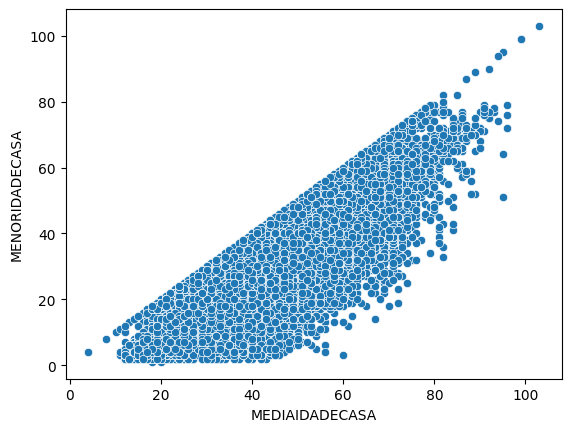

In [ ]:
sns.scatterplot(x=df_ommlbd['MEDIAIDADECASA'], y=df_ommlbd['MENORIDADECASA'])

<Axes: xlabel='MEDIAIDADECASA', ylabel='MAIORIDADECASA'>

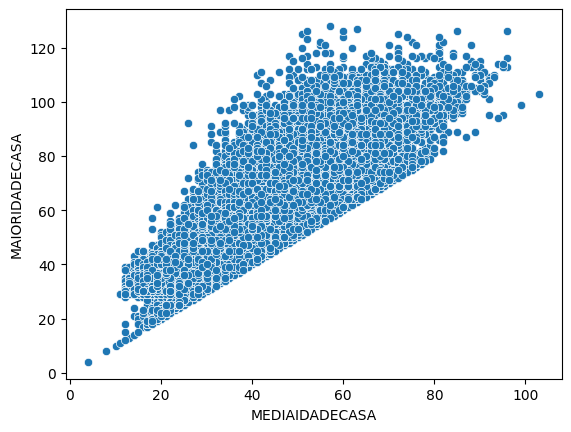

In [ ]:
sns.scatterplot(x=df_ommlbd['MEDIAIDADECASA'], y=df_ommlbd['MAIORIDADECASA'])

<Axes: xlabel='FUNCIONARIOPUBLICOCASA', ylabel='BOLSAFAMILIACASA'>

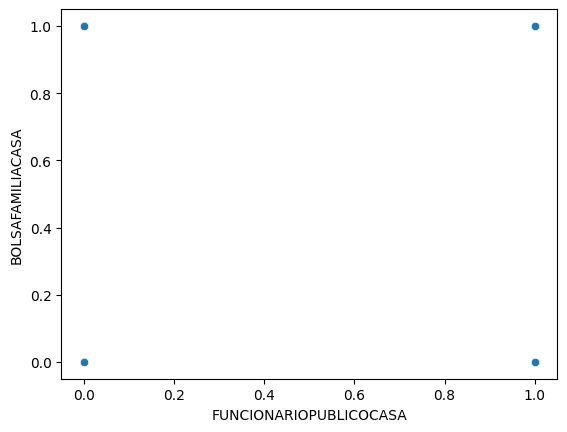

In [ ]:
sns.scatterplot(x=df_ommlbd['FUNCIONARIOPUBLICOCASA'], y=df_ommlbd['BOLSAFAMILIACASA'])

In [ ]:
df_ommlbd.corr(method='spearman')

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  \
HS_CPF                   1.000000        0.015735       -0.051980   
QTDPESSOASCASA           0.015735        1.000000       -0.286250   
MENORRENDACASA          -0.051980       -0.286250        1.000000   
MAIORRENDACASA          -0.032503        0.097193        0.421991   
SOMARENDACASA           -0.028454        0.352283        0.388763   
MEDIARENDACASA          -0.040688       -0.047900        0.567848   
MAIORIDADECASA           0.038584        0.218331        0.110815   
MENORIDADECASA           0.036941       -0.203960        0.278515   
MEDIAIDADECASA           0.036676       -0.082080        0.244746   
INDICMENORDEIDADE       -0.034331        0.129691       -0.109593   
COBRANCABAIXOCASA        0.071881        0.094190        0.006847   
COBRANCAMEDIOCASA        0.014856        0.031119        0.003975   
COBRANCAALTACASA         0.033257        0.026758       -0.008702   
SEGMENTACAOFINBAIXACASA  0.124969        0.069635       -0.018438   
SEGMENTACAOFINMEDIACASA  0.000688        0.008535        0.002043   
SEGMENTACAOALTACASA      0.001461        0.001549        0.002289   
BOLSAFAMILIACASA         0.062282        0.220827       -0.559304   
FUNCIONARIOPUBLICOCASA  -0.000952        0.077807        0.116294   

                         MAIORRENDACASA  SOMARENDACASA  MEDIARENDACASA  \
HS_CPF                        -0.032503      -0.028454       -0.040688   
QTDPESSOASCASA                 0.097193       0.352283       -0.047900   
MENORRENDACASA                 0.421991       0.388763        0.567848   
MAIORRENDACASA                 1.000000       0.937185        0.967199   
SOMARENDACASA                  0.937185       1.000000        0.901848   
MEDIARENDACASA                 0.967199       0.901848        1.000000   
MAIORIDADECASA                 0.279764       0.336616        0.260365   
MENORIDADECASA                 0.174868       0.135335        0.228644   
MEDIAIDADECASA                 0.267430       0.251622        0.299576   
INDICMENORDEIDADE             -0.064076      -0.026474       -0.089749   
COBRANCABAIXOCASA              0.056766       0.081497        0.043684   
COBRANCAMEDIOCASA              0.019548       0.026887        0.015696   
COBRANCAALTACASA               0.007444       0.014480        0.002811   
SEGMENTACAOFINBAIXACASA        0.007653       0.027397       -0.003318   
SEGMENTACAOFINMEDIACASA        0.008397       0.010280        0.007470   
SEGMENTACAOALTACASA            0.007720       0.008170        0.007346   
BOLSAFAMILIACASA              -0.322386      -0.258372       -0.422296   
FUNCIONARIOPUBLICOCASA         0.274166       0.284993        0.273883   

                         MAIORIDADECASA  MENORIDADECASA  MEDIAIDADECASA  \
HS_CPF                         0.038584        0.036941        0.036676   
QTDPESSOASCASA                 0.218331       -0.203960       -0.082080   
MENORRENDACASA                 0.110815        0.278515        0.244746   
MAIORRENDACASA                 0.279764        0.174868        0.267430   
SOMARENDACASA                  0.336616        0.135335        0.251622   
MEDIARENDACASA                 0.260365        0.228644        0.299576   
MAIORIDADECASA                 1.000000        0.492175        0.834323   
MENORIDADECASA                 0.492175        1.000000        0.820261   
MEDIAIDADECASA                 0.834323        0.820261        1.000000   
INDICMENORDEIDADE             -0.140041       -0.323339       -0.252690   
COBRANCABAIXOCASA              0.068612        0.040063        0.053481   
COBRANCAMEDIOCASA              0.014576        0.009104        0.012073   
COBRANCAALTACASA               0.014100        0.013061        0.013851   
SEGMENTACAOFINBAIXACASA        0.029706        0.004913        0.012375   
SEGMENTACAOFINMEDIACASA        0.009074        0.003363        0.005512   
SEGMENTACAOALTACASA            0.003426        0.000352        0.002592   
BOLSAFAMILIACASA              -0.

In [ ]:
df_ommlbd['SEGMENTACAOALTACASA'].value_counts()

SEGMENTACAOALTACASA
0.0    165506
1.0        14
Name: count, dtype: int64

# Relação entre variáveis categóricas

In [ ]:
df_titanic = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/titanic.csv')

In [ ]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
df_titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<Axes: xlabel='Survived', ylabel='Pclass'>

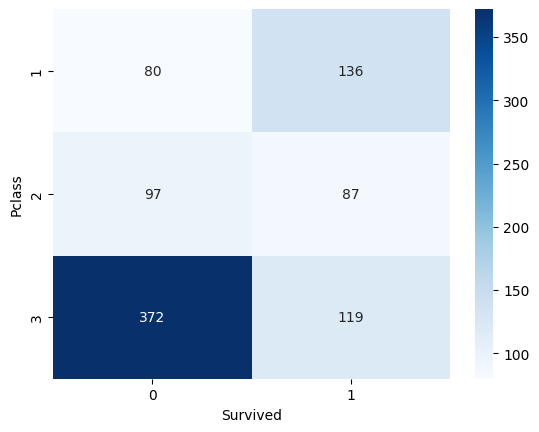

In [ ]:
# Há relação entre sobrevivencia e classe?
ctab = pd.crosstab(df_titanic['Pclass'],
                   df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Pclass'>

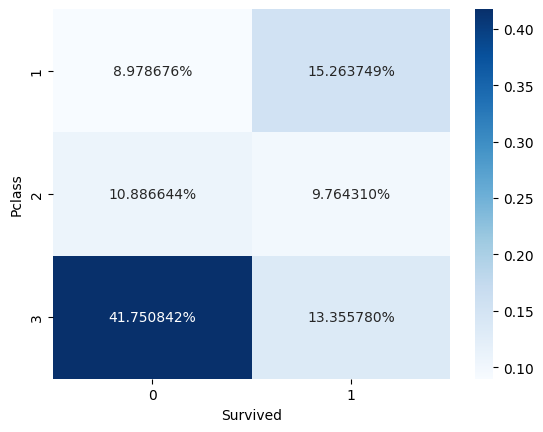

In [ ]:
# normalização por tudo
ctab = pd.crosstab(df_titanic['Pclass'],
                   df_titanic['Survived'],
                   normalize='all')
sns.heatmap(ctab, annot=True, fmt='%', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Pclass'>

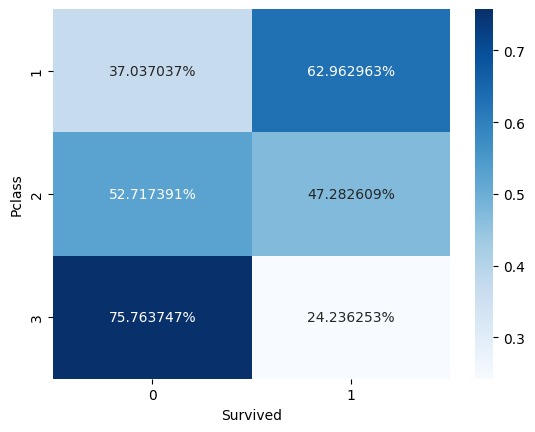

In [ ]:
# normalização por linha
ctab = pd.crosstab(df_titanic['Pclass'],
                   df_titanic['Survived'],
                   normalize='index')
sns.heatmap(ctab, annot=True, fmt='%', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Pclass'>

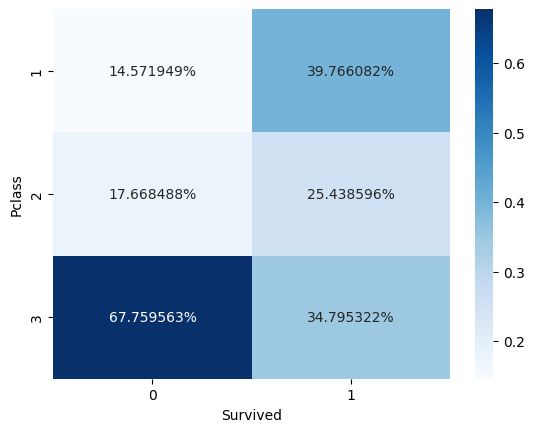

In [ ]:
# normalização por coluna
ctab = pd.crosstab(df_titanic['Pclass'],
                   df_titanic['Survived'],
                   normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Sex'>

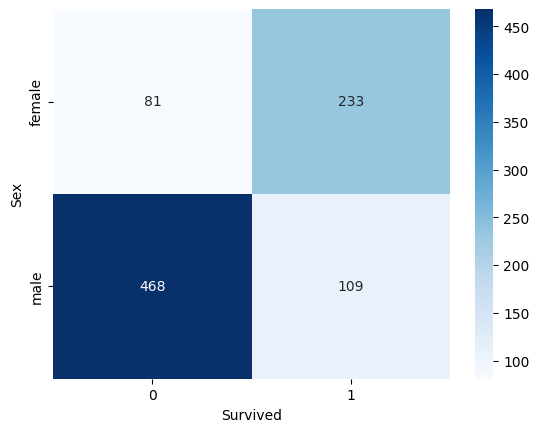

In [ ]:
# Há relação entre sobrevivencia e sexo?
ctab = pd.crosstab(df_titanic['Sex'],
                   df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Sex'>

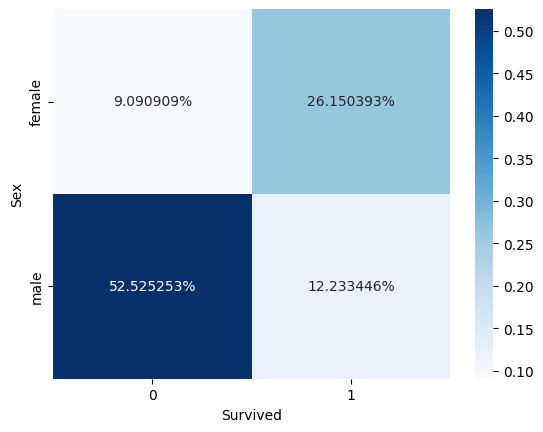

In [ ]:
# normalizacao pelo todo
ctab = pd.crosstab(df_titanic['Sex'],
                   df_titanic['Survived'],
                   normalize='all')
sns.heatmap(ctab, annot=True, fmt='%', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Sex'>

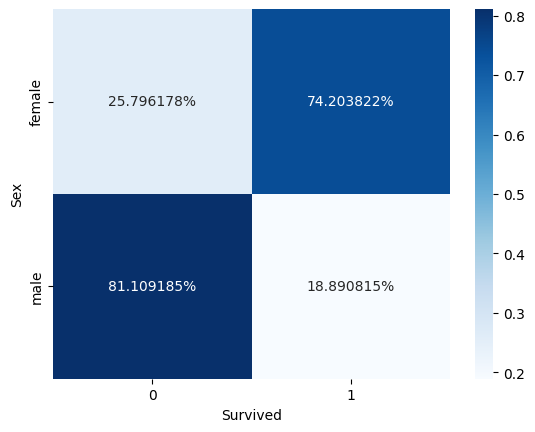

In [ ]:
# normalizacao pelas linhas
ctab = pd.crosstab(df_titanic['Sex'],
                   df_titanic['Survived'],
                   normalize='index')
sns.heatmap(ctab, annot=True, fmt='%', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Sex'>

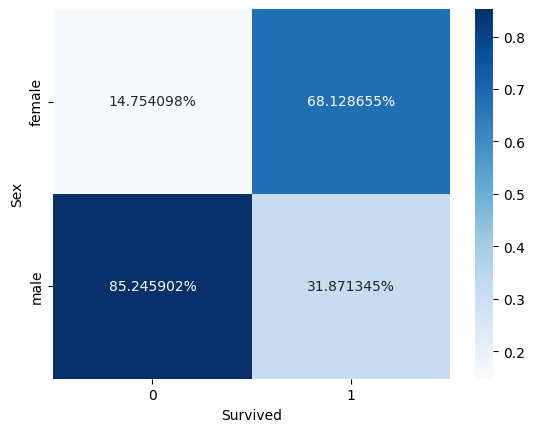

In [ ]:
# normalizacao pelas colunas
ctab = pd.crosstab(df_titanic['Sex'],
                   df_titanic['Survived'],
                   normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%', cmap='Blues')

<Axes: xlabel='Survived', ylabel='Sex-Pclass'>

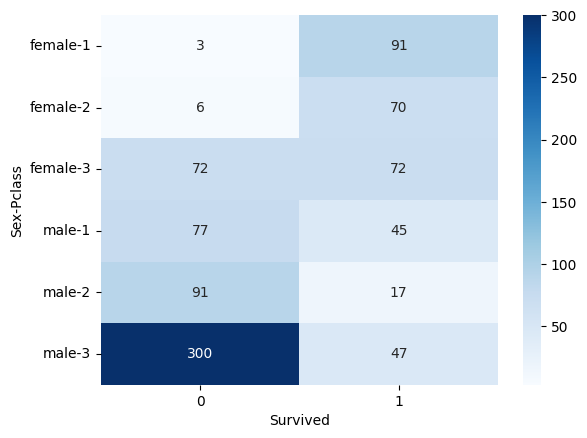

In [ ]:
# considerando mais colunas
ctab = pd.crosstab([df_titanic['Sex'], df_titanic['Pclass']],
                   df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')

In [ ]:
# Há relação entre sobrevivencia e idade?
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
# Adulto/criança
df_titanic['Adulto_crianca'] = df_titanic['Age'] > 12

In [ ]:
df_titanic['Adulto_crianca'] = df_titanic['Age'].apply(lambda x: 'Adulto' if x > 12 else 'Criança')

In [ ]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked Adulto_crianca  
0        0         A/5 21171   7.2500   NaN        S         Adulto  
1        0          PC 17599  71.2833   C85        C         Adulto  
2        0  STON/O2. 3101282   7.9250   NaN        S         Adulto  
3        0            113803  53.1000  C123        S         Adulto  
4        0            373450   8.0500   NaN        S         Adulto  
..     ...               ...      ...   ...      ...            ...  
886      0            211536  13.0000   NaN        S         Adulto  
887      0            112053  30.0000   B42        S         Adulto  
888      2        W./C. 6607  23.4500   NaN        S        Criança  
889      0            111369  30.0000  C148        C         Adulto  
890      0            370376   7.7500   NaN        Q         Adulto  

[891 rows x 13 columns]

In [ ]:
# Faixas (0-10, 10-18, 18-60,60+)

def fx_idade(x):
  if np.isnan(x):
    return '?'
  elif x <= 12:
    return 'Criança'
  elif x <= 18:
    return 'Adolescente'
  elif x <= 60:
    return 'Adulto'
  else:
    return 'Idoso'

df_titanic['fx_etaria'] = df_titanic['Age'].apply(fx_idade)

In [ ]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked Adulto_crianca fx_etaria  
0        0         A/5 21171   7.2500   NaN        S         Adulto    Adulto  
1        0          PC 17599  71.2833   C85        C         Adulto    Adulto  
2        0  STON/O2. 3101282   7.9250   NaN        S         Adulto    Adulto  
3        0            113803  53.1000  C123        S         Adulto    Adulto  
4        0            373450   8.0500   NaN        S         Adulto    Adulto  
..     ...               ...      ...   ...      ...            ...       ...  
886      0            211536  13.0000   NaN        S         Adulto    Adulto  
887      0            112053  30.0000   B42        S         Adulto    Adulto  
888      2        W./C. 6607  23.4500   NaN        S        Criança         ?  
889      0            111369  30.0000  C148        C         Adulto    Adulto  
890      0            370376   7.7500   NaN        Q         Adulto    Adulto  

[891 rows x 14 columns]

In [ ]:
df_titanic['fx_cut'] = pd.cut(df_titanic['Age'],
                              #bins=[-np.inf, 12, 18, 60, np.inf],
                              bins=[0, 12, 18, 60, np.inf],
                              labels=['Criança', 'Adolescente', 'Adulto', 'Idoso'])
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked Adulto_crianca fx_etaria  \
0        0         A/5 21171   7.2500   NaN        S         Adulto    Adulto   
1        0          PC 17599  71.2833   C85        C         Adulto    Adulto   
2        0  STON/O2. 3101282   7.9250   NaN        S         Adulto    Adulto   
3        0            113803  53.1000  C123        S         Adulto    Adulto   
4        0            373450   8.0500   NaN        S         Adulto    Adulto   
..     ...               ...      ...   ...      ...            ...       ...   
886      0            211536  13.0000   NaN        S         Adulto    Adulto   
887      0            112053  30.0000   B42        S         Adulto    Adulto   
888      2        W./C. 6607  23.4500   NaN        S        Criança         ?   
889      0            111369  30.0000  C148        C         Adulto    Adulto   
890      0            370376   7.7500   NaN        Q         Adulto    Adulto   

     fx_cut  
0    Adulto  
1    Adulto  
2    Adulto  
3    Adulto  
4    Adulto  
..      ...  
886  Adulto  
887  Adulto  
888     NaN  
889  Adulto  
890  Adulto  

[891 rows x 15 columns]

<Axes: xlabel='Survived', ylabel='fx_cut'>

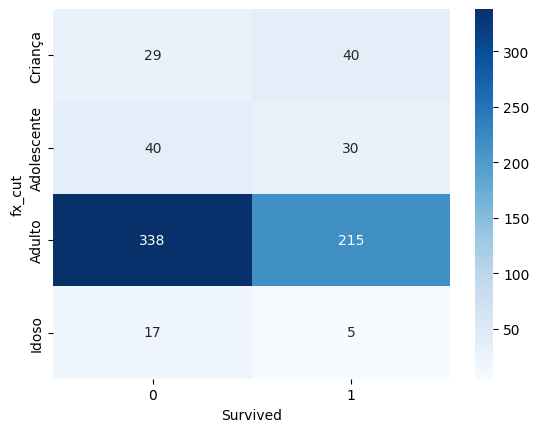

In [ ]:
ctab = pd.crosstab(df_titanic['fx_cut'],
                   df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')

# Aula 06 - Análise de Outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/'
                 'assets/data/datascience/enron.csv')

In [ ]:
df = df[df['name'] != 'TOTAL']

In [ ]:
# ENRON
df

bonus  deferral_payments  deferred_income  director_fees  \
0    4175000.0          2869717.0       -3081055.0            NaN   
1          NaN           178980.0              NaN            NaN   
2          NaN                NaN          -5104.0            NaN   
3    1200000.0          1295738.0       -1386055.0            NaN   
4     400000.0           260455.0        -201641.0            NaN   
..         ...                ...              ...            ...   
141        NaN                NaN         -25000.0       108579.0   
142        NaN                NaN              NaN            NaN   
143        NaN                NaN              NaN            NaN   
144        NaN                NaN              NaN            NaN   
145        NaN                NaN              NaN            NaN   

                  email_address  exercised_stock_options  expenses  \
0       phillip.allen@enron.com                1729541.0   13868.0   
1                           NaN                 257817.0    3486.0   
2    james.bannantine@enron.com                4046157.0   56301.0   
3                           NaN                6680544.0   11200.0   
4           frank.bay@enron.com                      NaN  129142.0   
..                          ...                      ...       ...   
141                         NaN                      NaN    1413.0   
142     john.wodraska@enron.com                      NaN       NaN   
143                         NaN                 139130.0       NaN   
144      scott.yeager@enron.com                8308552.0   53947.0   
145                         NaN                 192758.0   55097.0   

     from_messages  from_poi_to_this_person  from_this_person_to_poi  ...  \
0           2195.0                     47.0                     65.0  ...   
1              NaN                      NaN                      NaN  ...   
2             29.0                     39.0                      0.0  ...   
3              NaN                      NaN                      NaN  ...   
4              NaN                      NaN                      NaN  ...   
..             ...                      ...                      ...  ...   
141            NaN                      NaN                      NaN  ...   
142            NaN                      NaN                      NaN  ...   
143            NaN                      NaN                      NaN  ...   
144            NaN                      NaN                      NaN  ...   
145            NaN                      NaN                      NaN  ...   

         other    poi  restricted_stock  restricted_stock_deferred    salary  \
0        152.0  False          126027.0                  -126027.0  201955.0   
1          NaN  False               NaN                        NaN       NaN   
2     864523.0  False         1757552.0                  -560222.0     477.0   
3    2660303.0  False         3942714.0                        NaN  267102.0   
4         69.0  False          145796.0                   -82782.0  239671.0   
..         ...    ...               ...                        ...       ...   
141        NaN  False               NaN                        NaN       NaN   
142   189583.0  False               NaN                        NaN       NaN   
143        NaN  False               NaN                        NaN       NaN   
144   147950.0   True         3576206.0                        NaN  158403.0   
145        NaN  False               NaN                        NaN       NaN   

     shared_receipt_with_poi  to_messages  total_payments  total_stock_value  \
0                     1407.0       2902.0       4484442.0          1729541.0   
1                        NaN          NaN        182466.0           257817.0   
2                      465.0        566.0        916197.0          5243487.0   
3                        NaN          NaN       5634343.0         10623258.0   
4                        NaN          NaN        8276

In [ ]:
# lista de outliers
outliers = []

# dicionario (linha -> colunas)
dict_ix_colunas_outlier = {}

# laco de repeticao que avança nas colunas NUMERICAS
for col in df.select_dtypes(include='number').columns:
  #print(f'Col: {col}')

  # Calculando quartis
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  # Calculando IQR
  iqr = q3 - q1

  # print(f'Q1: {q1} \t Q3: {q3} \t IQR: {iqr}')

  # Whiskers
  whisker_sup = q3 + 1.5 * iqr
  whisker_inf = q1 - 1.5 * iqr

  # condicao para ser outlier (x < whisker_inf | x > whisker_sup)
  outliers_col = list(df[(df[col] < whisker_inf) | (df[col] > whisker_sup)].index)

  # print(outliers_col)
  # Guarda em outliers todos os valores em outlier_col
  outliers.extend(outliers_col)
  # identico a:
  #for ix in outliers_col:
  #  outliers.append(ix)

  # armazenando colunas para cada indice
  for ix in outliers_col:
    if ix not in dict_ix_colunas_outlier:
      dict_ix_colunas_outlier[ix] = []
    dict_ix_colunas_outlier[ix].append(col)

from collections import Counter
outliers_freq = Counter(outliers)
for ix, contagem in outliers_freq.most_common(10):
  print(f'Indice: {ix} \t apareceu como outlier {contagem} vezes')



Indice: 7 	 apareceu como outlier 9 vezes
Indice: 47 	 apareceu como outlier 9 vezes
Indice: 79 	 apareceu como outlier 8 vezes
Indice: 139 	 apareceu como outlier 8 vezes
Indice: 78 	 apareceu como outlier 7 vezes
Indice: 122 	 apareceu como outlier 7 vezes
Indice: 0 	 apareceu como outlier 5 vezes
Indice: 75 	 apareceu como outlier 5 vezes
Indice: 3 	 apareceu como outlier 5 vezes
Indice: 32 	 apareceu como outlier 5 vezes


In [ ]:
dict_ix_colunas_outlier[79]

['bonus',
 'exercised_stock_options',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'salary',
 'total_payments',
 'total_stock_value']

In [ ]:
df.loc[79]

bonus                                    7000000.0
deferral_payments                         202911.0
deferred_income                          -300000.0
director_fees                                  NaN
email_address                kenneth.lay@enron.com
exercised_stock_options                 34348384.0
expenses                                   99832.0
from_messages                                 36.0
from_poi_to_this_person                      123.0
from_this_person_to_poi                       16.0
loan_advances                           81525000.0
long_term_incentive                      3600000.0
other                                   10359729.0
poi                                           True
restricted_stock                        14761694.0
restricted_stock_deferred                      NaN
salary                                   1072321.0
shared_receipt_with_poi                     2411.0
to_messages                                 4273.0
total_payments                         103559793.0
total_stock_value                       49110078.0
name                                 LAY KENNETH L
Name: 79, dtype: object

# Aula 06 - Pré-processamento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/titanic.csv')

In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],
        axis=1,
        inplace=True)

In [ ]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [ ]:
X, y = df.drop('Survived', axis=1), df['Survived']

In [ ]:
X

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]

<ipython-input-30-a68d0d6b2ad1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Age'])


<Axes: xlabel='Age', ylabel='Density'>

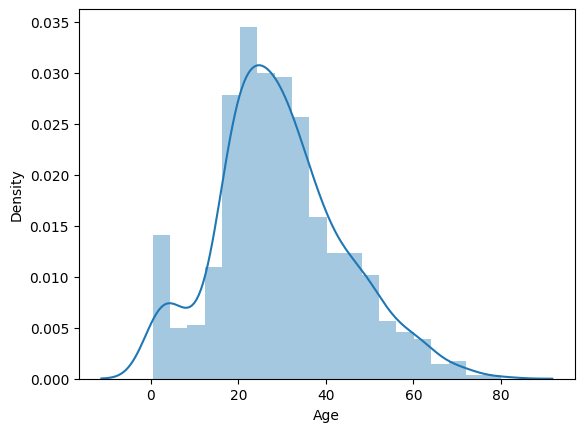

In [ ]:
sns.distplot(X['Age'])

<ipython-input-31-6f2f84af9ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

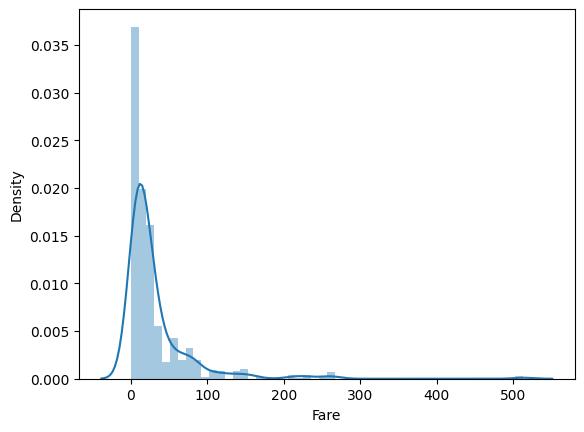

In [ ]:
sns.distplot(X['Fare'])

In [ ]:
100 * X.isna().sum() / len(X)

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [ ]:
df[df['Embarked'].isna()]

Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

In [ ]:
len(df)

891

In [ ]:
df['Survived'].value_counts() / len(df)

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [ ]:
# Imputacao: numericas (mediana), categorica (moda)
# OHE: Sex, Embarked
# Assimetria: normalizacao
# Escala

In [ ]:
# colunas para imputacao
cols_imp_num = ['Age']
cols_imp_cat = ['Embarked']
colunas_ohe = ['imp_cat__Embarked', 'remainder__Sex']

In [ ]:
pipeline = Pipeline(
    steps=[
        ('imp', ColumnTransformer(
            transformers=[
                # nome, estratégia de imputação, quais colunas
                ('imp_num', SimpleImputer(strategy='median').set_output(transform='pandas'), cols_imp_num),
                ('imp_cat', SimpleImputer(strategy='most_frequent').set_output(transform='pandas'), cols_imp_cat)
            ]
        , remainder='passthrough').set_output(transform='pandas')),
        ('cat', ColumnTransformer(
            transformers=[
                ('ohe', OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas'), colunas_ohe)
            ]
        , remainder='passthrough').set_output(transform='pandas')),
        ('norm', PowerTransformer(method='yeo-johnson').set_output(transform='pandas')),
        ('scale', MinMaxScaler().set_output(transform='pandas'))
    ]
)

In [ ]:
pipeline

Pipeline(steps=[('imp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('imp_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Embarked'])])),
                ('cat',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['imp_cat__Embarked',
                                                   'remainder__Sex'])])),
                ('norm', PowerTransformer()), ('scale', MinMaxScaler())])

In [ ]:
df_transformado = pipeline.fit_transform(X)
df_transformado

ohe__imp_cat__Embarked_Q  ohe__imp_cat__Embarked_S  \
0                         0.0                       1.0   
1                         0.0                       0.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
..                        ...                       ...   
886                       0.0                       1.0   
887                       0.0                       1.0   
888                       0.0                       1.0   
889                       0.0                       0.0   
890                       1.0                       0.0   

     ohe__remainder__Sex_male  remainder__imp_num__Age  \
0                         1.0                 0.343160   
1                         0.0                 0.542804   
2                         0.0                 0.395247   
3                         0.0                 0.506943   
4                         1.0                 0.506943   
..                        ...                      ...   
886                       1.0                 0.408006   
887                       0.0                 0.302837   
888                       0.0                 0.420670   
889                       1.0                 0.395247   
890                       1.0                 0.470446   

     remainder__remainder__Pclass  remainder__remainder__SibSp  \
0                        1.000000                       0.8348   
1                        0.000000                       0.8348   
2                        1.000000                       0.0000   
3                        0.000000                       0.8348   
4                        1.000000                       0.0000   
..                            ...                          ...   
886                      0.373003                       0.0000   
887                      0.000000                       0.0000   
888                      1.000000                       0.8348   
889                      0.000000                       0.0000   
890                      1.000000                       0.0000   

     remainder__remainder__Parch  remainder__remainder__Fare  
0                       0.000000                    0.408170  
1                       0.000000                    0.748736  
2                       0.000000                    0.421814  
3                       0.000000                    0.707339  
4                       0.000000                    0.424216  
..                           ...                         ...  
886                     0.000000                    0.497930  
887                     0.000000                    0.624414  
888                     0.988843                    0.587672  
889                     0.000000                    0.624414  
890                     0.000000                    0.418388  

[891 rows x 8 columns]

<ipython-input-68-15ebfc8b9836>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_transformado['remainder__imp_num__Age'])


<Axes: xlabel='remainder__imp_num__Age', ylabel='Density'>

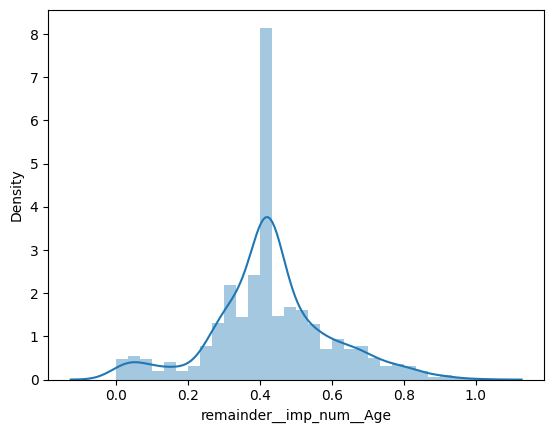

In [ ]:
sns.distplot(df_transformado['remainder__imp_num__Age'])

<ipython-input-69-f35a6153d066>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_transformado['remainder__remainder__Fare'])


<Axes: xlabel='remainder__remainder__Fare', ylabel='Density'>

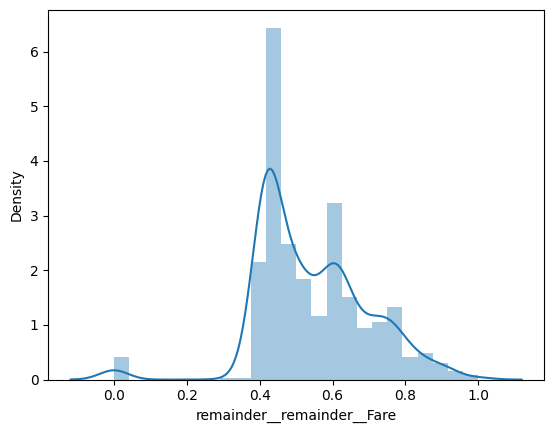

In [ ]:
sns.distplot(df_transformado['remainder__remainder__Fare'])

# Aula 07 - PCA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer

In [5]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/customers.csv')

In [6]:
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicatessen  
0            1338  
1            1776  
2            7844  
3            1788  
4            5185  
..            ...  
435          2204  
436          2346  
437          1867  
438          2125  
439            52  

[440 rows x 8 columns]

In [7]:
# removendo colunas categóricas
df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [8]:
df

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    12669   9656     7561     214              2674          1338
1     7057   9810     9568    1762              3293          1776
2     6353   8808     7684    2405              3516          7844
3    13265   1196     4221    6404               507          1788
4    22615   5410     7198    3915              1777          5185
..     ...    ...      ...     ...               ...           ...
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841          1867
438  10290   1981     2232    1038               168          2125
439   2787   1698     2510      65               477            52

[440 rows x 6 columns]

array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicatessen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicatessen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicatessen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xla

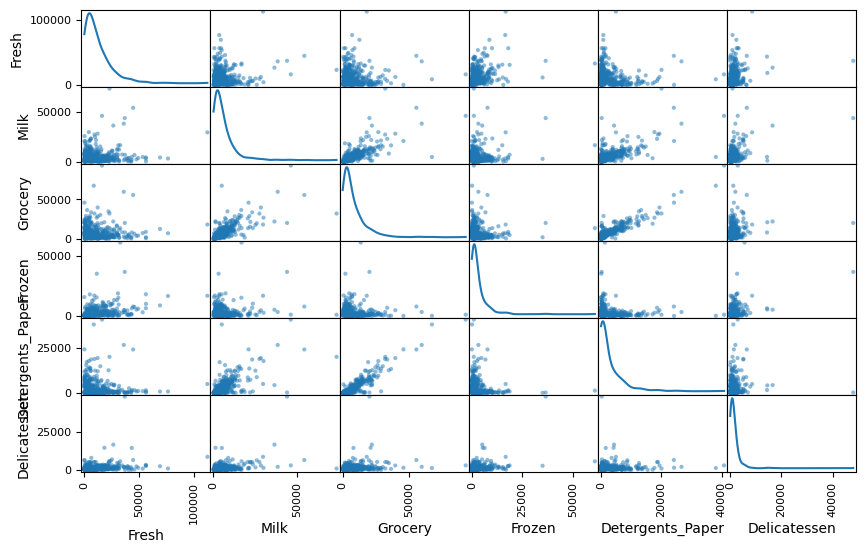

In [9]:
pd.plotting.scatter_matrix(df, figsize=(10, 6), diagonal='kde')

In [10]:
# como vimos que as variáveis tem assimetria positiva,
# vamos aplicar o Power-Transformer para normalizar os dados
pt = PowerTransformer(method='yeo-johnson')
df_pt = pd.DataFrame(data=pt.fit_transform(df), columns=df.columns)

In [11]:
df_pt

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0    0.413012  0.979454  0.394901 -1.457973          0.620530      0.338074
1   -0.110911  0.995243  0.628376  0.080081          0.751556      0.602222
2   -0.195814  0.888063  0.410688  0.332499          0.793104      2.240051
3    0.458126 -0.965336 -0.154740  1.173953         -0.372736      0.608674
4    1.028870  0.412660  0.346961  0.742061          0.367767      1.737333
..        ...       ...       ...       ...               ...           ...
435  1.357048  1.202056  1.164393  1.839006         -0.939366      0.813167
436  1.720136 -0.808722 -1.555067  0.864317         -1.292179      0.875764
437  0.549408  1.458127  1.872985 -0.969355          1.745475      0.650292
438  0.216364 -0.519952 -0.711793 -0.333606         -0.982203      0.776907
439 -0.777766 -0.657605 -0.612450 -2.204347         -0.407423     -1.870845

[440 rows x 6 columns]

array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicatessen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicatessen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicatessen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xla

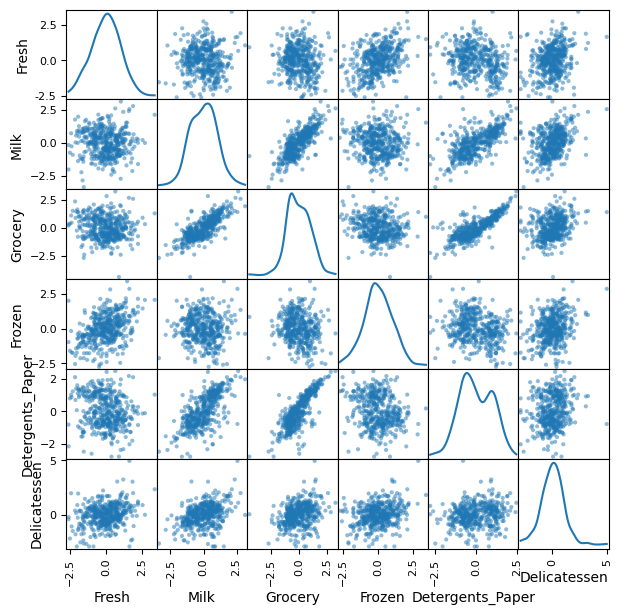

In [13]:
pd.plotting.scatter_matrix(df_pt, figsize=(7, 7), diagonal='kde')

In [38]:
# aplicacao do PCA
# mantendo 95% da variância (do comportamento original dos dados)
pca = PCA(n_components=0.9)

# criando componentes principais
pca.fit(df_pt)

# criando tabela com novas colunas (componentes principais)
df_pca = pca.transform(df_pt)

# Outra alternativa:
# df_pca = pca.fit_transform(df_pt)

In [39]:
df_pca

array([[ 1.31717764, -0.40236254,  0.50344774, -1.22681119],
       [ 1.45503892,  0.32689403, -0.20987273,  0.05742895],
       [ 1.66855653,  1.26023955, -1.36392338, -0.54986089],
       ...,
       [ 3.03821597,  0.05698212,  0.77304276, -0.6868279 ],
       [-1.01584611,  0.37972803, -0.58406191, -0.98107902],
       [-1.04145165, -2.7735677 ,  0.74998199, -0.70163034]])

In [40]:
pca.components_

array([[-0.09167115,  0.54253442,  0.57081204, -0.12186694,  0.54593988,
         0.24191841],
       [ 0.59275256,  0.11788815, -0.00872956,  0.59616044, -0.10492423,
         0.51793263],
       [ 0.72601378,  0.02898374,  0.14432925, -0.14680998,  0.18772905,
        -0.6280427 ],
       [-0.33426874,  0.07399849,  0.09744314,  0.77672244,  0.16078613,
        -0.49410883]])

In [41]:
def pca_results(df, pca):
  '''
  Create a DataFrame of the PCA results
  Includes dimension feature weights and explained variance
  Visualizes the PCA results
  '''
  # Dimension indexing
  dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
  # PCA components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
  components.index = dimensions
  # PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
  variance_ratios.index = dimensions
  # Create a bar plot visualization
  fig, ax = plt.subplots(figsize = (14,8))
  # Plot the feature weights as a function of the components
  components.plot(ax = ax, kind = 'bar');
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)
  # Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
  # Return a concatenated DataFrame
  return pd.concat([variance_ratios, components], axis = 1)

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4489 -0.0917  0.5425   0.5708 -0.1219   
Dimension 2              0.2800  0.5928  0.1179  -0.0087  0.5962   
Dimension 3              0.1019  0.7260  0.0290   0.1443 -0.1468   
Dimension 4              0.0962 -0.3343  0.0740   0.0974  0.7767   

             Detergents_Paper  Delicatessen  
Dimension 1            0.5459        0.2419  
Dimension 2           -0.1049        0.5179  
Dimension 3            0.1877       -0.6280  
Dimension 4            0.1608       -0.4941

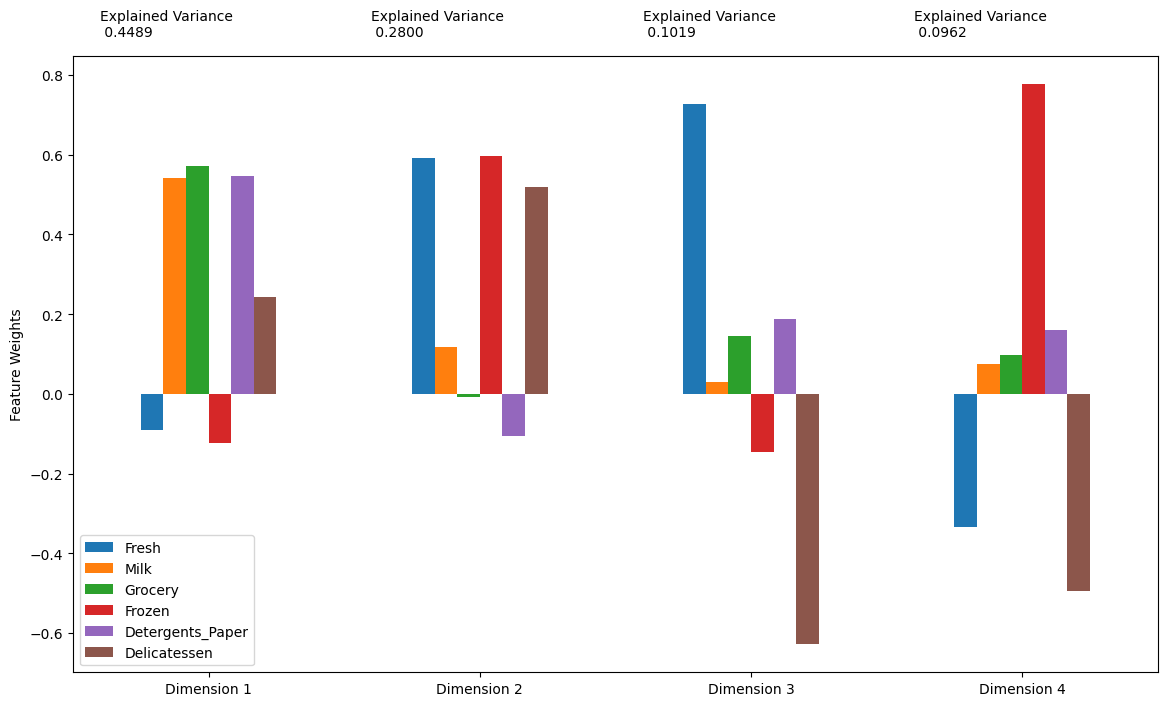

In [42]:
pca_explicacao = pca_results(df_pt, pca)
pca_explicacao

In [43]:
tbl_pca = pd.DataFrame(data=df_pca, columns=[f'PC {x}' for x in range(df_pca.shape[1])])
#tbl_pca.sort_values(by='PC 1', ascending=False)
tbl_pca

PC 0      PC 1      PC 2      PC 3
0    1.317178 -0.402363  0.503448 -1.226811
1    1.455039  0.326894 -0.209873  0.057429
2    1.668557  1.260240 -1.363923 -0.549861
3   -0.853361  1.213330 -0.342302  0.311505
4    0.858253  1.959105 -0.322010 -0.502498
..        ...       ...       ...       ...
435  0.652173  2.552008  0.231097  0.624361
436 -2.083018  2.042291  0.081474 -0.755515
437  3.038216  0.056982  0.773043 -0.686828
438 -1.015846  0.379728 -0.584062 -0.981079
439 -1.041452 -2.773568  0.749982 -0.701630

[440 rows x 4 columns]

In [49]:
df

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    12669   9656     7561     214              2674          1338
1     7057   9810     9568    1762              3293          1776
2     6353   8808     7684    2405              3516          7844
3    13265   1196     4221    6404               507          1788
4    22615   5410     7198    3915              1777          5185
..     ...    ...      ...     ...               ...           ...
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841          1867
438  10290   1981     2232    1038               168          2125
439   2787   1698     2510      65               477            52

[440 rows x 6 columns]

array([[<Axes: xlabel='PC 0', ylabel='PC 0'>,
        <Axes: xlabel='PC 1', ylabel='PC 0'>,
        <Axes: xlabel='PC 2', ylabel='PC 0'>,
        <Axes: xlabel='PC 3', ylabel='PC 0'>,
        <Axes: xlabel='PC 4', ylabel='PC 0'>],
       [<Axes: xlabel='PC 0', ylabel='PC 1'>,
        <Axes: xlabel='PC 1', ylabel='PC 1'>,
        <Axes: xlabel='PC 2', ylabel='PC 1'>,
        <Axes: xlabel='PC 3', ylabel='PC 1'>,
        <Axes: xlabel='PC 4', ylabel='PC 1'>],
       [<Axes: xlabel='PC 0', ylabel='PC 2'>,
        <Axes: xlabel='PC 1', ylabel='PC 2'>,
        <Axes: xlabel='PC 2', ylabel='PC 2'>,
        <Axes: xlabel='PC 3', ylabel='PC 2'>,
        <Axes: xlabel='PC 4', ylabel='PC 2'>],
       [<Axes: xlabel='PC 0', ylabel='PC 3'>,
        <Axes: xlabel='PC 1', ylabel='PC 3'>,
        <Axes: xlabel='PC 2', ylabel='PC 3'>,
        <Axes: xlabel='PC 3', ylabel='PC 3'>,
        <Axes: xlabel='PC 4', ylabel='PC 3'>],
       [<Axes: xlabel='PC 0', ylabel='PC 4'>,
        <Axes: xlabel='PC 1', 

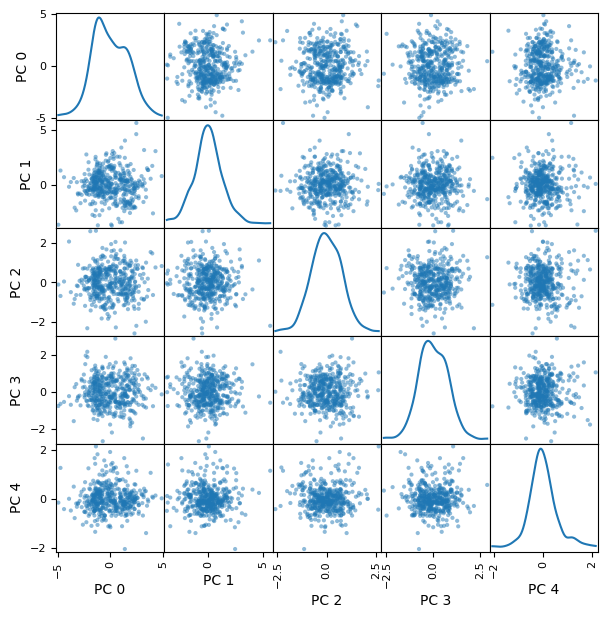

In [32]:
pd.plotting.scatter_matrix(tbl_pca, figsize=(7, 7), diagonal='kde')

# Aula 07 - t-SNE

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [51]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [53]:
df_mnist = pd.DataFrame(mnist.data)
df_mnist['classe'] = mnist.target

In [54]:
df_mnist

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel781  pixel782  pixel783  pixel784  classe  
0             0         0         0         0       5  
1             0         0         0         0       0  
2             0         0         0         0       4  
3             0         0         0         0       1  
4             0         0         0         0       9  
...         ...       ...       ...       ...     ...  
69995         0         0         0         0       2  
69996         0         0         0         0       3  
69997         0         0         0         0       4  
69998         0         0         0         0       5  
69999         0         0         0         0       6  

[70000 rows x 785 columns]

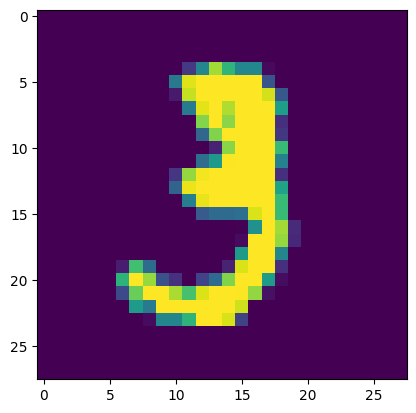

In [61]:
plt.imshow(df_mnist.drop('classe', axis=1).loc[10].values.reshape(28, 28))

In [62]:
# Aviso: selecionando apenas uma parte da base de dados
df_amostra = df_mnist.sample(frac=0.05).reset_index(drop=True)

In [63]:
len(df_amostra)

3500

In [91]:
# separar os pixels da classe (dígito)
X, classe = df_amostra.drop('classe', axis=1), df_amostra['classe']

In [92]:
# aplicando o TSNE
tsne = TSNE(n_components=2, n_iter=500, random_state=10)
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [95]:
X_tsne

array([[-16.339016 , -24.446667 ],
       [-31.99728  ,   6.913816 ],
       [-30.926653 ,   6.8121495],
       ...,
       [ -8.175704 , -14.015013 ],
       [-21.417873 , -21.041208 ],
       [ -3.2692869, -25.8426   ]], dtype=float32)

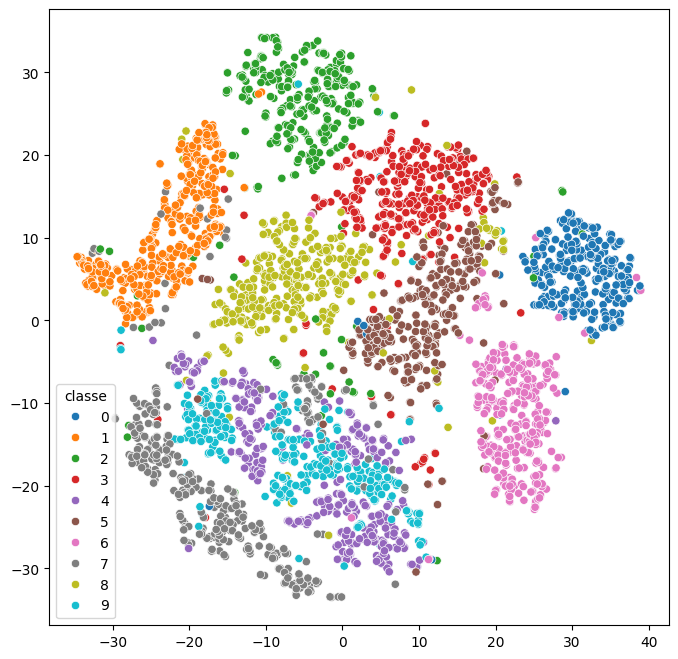

In [94]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=classe)
plt.show()

In [96]:
df_tsne = pd.DataFrame(data=X_tsne, columns=['componente_1', 'componente_2'])
df_tsne['classe'] = classe

In [99]:
df_tsne[(df_tsne['classe'] == '2') & (df_tsne['componente_1'] > 25)]

componente_1  componente_2 classe
150      28.663071     15.715553      2
484      28.779791     15.550772      2
901      25.006155      7.761794      2
2980     31.334166     10.462090      2

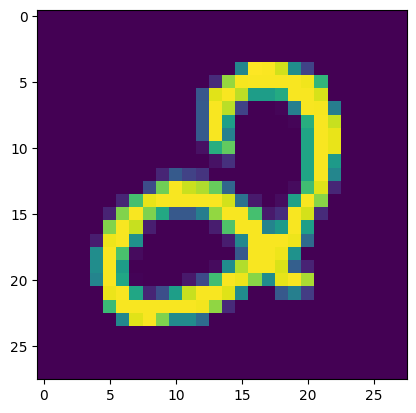

In [103]:
plt.imshow(df_amostra.drop('classe', axis=1).loc[2980].values.reshape(28, 28))